In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Auto Sales data.csv")

In [3]:
df.shape

(2747, 20)

## Exploratory Data Analysis

In [4]:
df.head()

ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10168               36      96.66                1  3479.76   

    ORDERDATE  DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0  24/02/2018                   828  Shipped  Motorcycles    95    S10_1678   
1  07/05/2018                   757  Shipped  Motorcycles    95    S10_1678   
2  01/07/2018                   703  Shipped  Motorcycles    95    S10_1678   
3  25/08/2018                   649  Shipped  Motorcycles    95    S10_1678   
4  28/10/2018                   586  Shipped  Motorcycles    95    S10_1678   

           CUSTOMERNAME             PHONE                   ADDRESSLINE1  \
0     Land of Toys Inc.        2125557818        897 Long Airport Avenue   
1    Reims Collectables        26.47.1555             59 rue de l'Abbaye   
2       Lyon Souveniers  +33 1 46 62 7555  27 rue du Colonel Pierre Avia   
3     Toys4GrownUps.com        6265557265             78934 Hillside Dr.   
4  Technics Stores Inc.        6505556809              9408 Furth Circle   

         CITY POSTALCODE COUNTRY CONTACTLASTNAME CONTACTFIRSTNAME DEALSIZE  
0         NYC      10022     USA              Yu             Kwai    Small  
1       Reims      51100  France         Henriot             Paul    Small  
2       Paris      75508  France        Da Cunha           Daniel   Medium  
3    Pasadena      90003     USA           Young            Julie   Medium  
4  Burlingame      94217     USA          Hirano             Juri   Medium

In [5]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

The dataset contains 2747 rows with 20 columns.

There is no missing values in any of the column



In [7]:
df.describe()

ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2747.000000      2747.000000  2747.000000      2747.000000   
mean   10259.761558        35.103021   101.098952         6.491081   
std       91.877521         9.762135    42.042549         4.230544   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10181.000000        27.000000    68.745000         3.000000   
50%    10264.000000        35.000000    95.550000         6.000000   
75%    10334.500000        43.000000   127.100000         9.000000   
max    10425.000000        97.000000   252.870000        18.000000   

              SALES  DAYS_SINCE_LASTORDER         MSRP  
count   2747.000000           2747.000000  2747.000000  
mean    3553.047583           1757.085912   100.691664  
std     1838.953901            819.280576    40.114802  
min      482.130000             42.000000    33.000000  
25%     2204.350000           1077.000000    68.000000  
50%     3184.800000           1761.000000    99.000000  
75%     4503.095000           2436.500000   124.000000  
max    14082.800000           3562.000000   214.000000

In [8]:
# dropping ORDERNUMBER column as it is not relevant for analysis
df.drop('ORDERNUMBER',axis=1,inplace=True)

In [9]:
# creating a separate dataframe for categorical columns and dropping unwanted  columns 
df.drop(columns=['PHONE','ADDRESSLINE1', 'CONTACTLASTNAME','CONTACTFIRSTNAME'],axis=1,inplace=True)
df_cats=df.select_dtypes(include=['object'])
print("important categorical columns\n", df_cats.columns)

important categorical columns
 Index(['ORDERDATE', 'STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'CUSTOMERNAME',
       'CITY', 'POSTALCODE', 'COUNTRY', 'DEALSIZE'],
      dtype='object')


In [10]:
# similary, creating a separate dataframe for numberical columns
df_numerical=df.select_dtypes(include=['float64', 'int64'])
print("important numerical columns\n", df_numerical.columns)

important numerical columns
 Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES',
       'DAYS_SINCE_LASTORDER', 'MSRP'],
      dtype='object')


In [11]:
df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])

/var/folders/0p/ymp040w9635_dvl03v46wjp00000gn/T/ipykernel_48508/121956824.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['ORDERDATE']=pd.to_datetime(df['ORDERDATE'])


In [12]:
df.head(2)

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  ORDERDATE  \
0               30      95.70                2  2871.0 2018-02-24   
1               34      81.35                5  2765.9 2018-05-07   

   DAYS_SINCE_LASTORDER   STATUS  PRODUCTLINE  MSRP PRODUCTCODE  \
0                   828  Shipped  Motorcycles    95    S10_1678   
1                   757  Shipped  Motorcycles    95    S10_1678   

         CUSTOMERNAME   CITY POSTALCODE COUNTRY DEALSIZE  
0   Land of Toys Inc.    NYC      10022     USA    Small  
1  Reims Collectables  Reims      51100  France    Small

In [13]:
#dropping the column "DAYS_SINCE_LASTORDER" and creating a new column in datetime format
df.drop('DAYS_SINCE_LASTORDER',axis=1,inplace=True)
todays_date=pd.Timestamp.now().normalize()
df['DAYS_SINCE_LASTORDER']=(todays_date-df['ORDERDATE']).dt.days

In [14]:
df.head(3)

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  ORDERDATE   STATUS  \
0               30      95.70                2  2871.00 2018-02-24  Shipped   
1               34      81.35                5  2765.90 2018-05-07  Shipped   
2               41      94.74                2  3884.34 2018-07-01  Shipped   

   PRODUCTLINE  MSRP PRODUCTCODE        CUSTOMERNAME   CITY POSTALCODE  \
0  Motorcycles    95    S10_1678   Land of Toys Inc.    NYC      10022   
1  Motorcycles    95    S10_1678  Reims Collectables  Reims      51100   
2  Motorcycles    95    S10_1678     Lyon Souveniers  Paris      75508   

  COUNTRY DEALSIZE  DAYS_SINCE_LASTORDER  
0     USA    Small                  2217  
1  France    Small                  2145  
2  France   Medium                  2090

In [15]:
# describing numerical columns
df_numerical.describe()

QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER         SALES  \
count      2747.000000  2747.000000      2747.000000   2747.000000   
mean         35.103021   101.098952         6.491081   3553.047583   
std           9.762135    42.042549         4.230544   1838.953901   
min           6.000000    26.880000         1.000000    482.130000   
25%          27.000000    68.745000         3.000000   2204.350000   
50%          35.000000    95.550000         6.000000   3184.800000   
75%          43.000000   127.100000         9.000000   4503.095000   
max          97.000000   252.870000        18.000000  14082.800000   

       DAYS_SINCE_LASTORDER         MSRP  
count           2747.000000  2747.000000  
mean            1757.085912   100.691664  
std              819.280576    40.114802  
min               42.000000    33.000000  
25%             1077.000000    68.000000  
50%             1761.000000    99.000000  
75%             2436.500000   124.000000  
max             3562.000000   214.000000

Quantity Ordered (QUANTITYORDERED):

The average quantity of items ordered is moderate, indicating a typical order size of around 35 units.
Orders vary widely in size, ranging from as low as 6 units to as high as 97 units, suggesting diverse customer needs or preferences.
There is notable variability in the quantity ordered, with orders typically deviating from the average by approximately 9.76 units.

Price Each (PRICEEACH):

The average price per item is relatively high, around $101.10, suggesting that the products may be of higher value or quality.
Prices vary significantly, with individual items priced anywhere between $26.88 and $252.87, indicating a diverse product range.
There is considerable price variability across items, with prices typically deviating from the average by approximately $42.04.

Sales (SALES):

The average sales amount per order is relatively substantial, approximately $3553.05, indicating that customers tend to make significant purchases.
Sales figures exhibit a wide range, spanning from $482.13 to $14082.80 per order, highlighting variability in order sizes or product prices.
There is significant variability in sales amounts, with orders typically deviating from the average by approximately $1838.95.

Days Since Last Order (DAYS_SINCE_LASTORDER):

On average, there is a considerable gap of approximately 1757.09 days between consecutive orders, indicating infrequent purchasing behavior or long repurchase cycles.
The time elapsed since the last order varies widely, ranging from as short as 42 days to as long as 3562 days, suggesting diverse customer engagement patterns.
There is notable variability in the time elapsed since the last order, with orders typically deviating from the average by approximately 819.28 days.

In [16]:
# describing categorical columns
df_cats.describe()

ORDERDATE   STATUS   PRODUCTLINE PRODUCTCODE           CUSTOMERNAME  \
count         2747     2747          2747        2747                   2747   
unique         246        6             7         109                     89   
top     14/11/2018  Shipped  Classic Cars    S18_3232  Euro Shopping Channel   
freq            38     2541           949          51                    259   

          CITY POSTALCODE COUNTRY DEALSIZE  
count     2747       2747    2747     2747  
unique      71         73      19        3  
top     Madrid      28034     USA   Medium  
freq       304        259     928     1349

The most frequent order date is 14/11/2018, occurring 38 times.

The most common status is "Shipped," which occurs 2541 times.

The most popular product line is "Classic Cars," with 949 occurrences.

The most frequently appearing product code is "S18_3232," occurring 51 times.

The most frequent customer name is "Euro Shopping Channel," appearing 259 times.

The most common city in the dataset is Madrid, with 304 occurrences.

The postal code "28034" appears most frequently, with 259 instances.

Data includes records from 19 unique countries.

The most prevalent country is the USA, represented 928 times.

The most common deal size is "Medium," occurring 1349 times.

In [17]:
# checking for duplicate values, there are no duplicate values
df.duplicated().sum()

0

In [18]:
# checking different products with respect to their status
pd.crosstab(df['STATUS'], df['PRODUCTLINE'])

PRODUCTLINE  Classic Cars  Motorcycles  Planes  Ships  Trains  \
STATUS                                                          
Cancelled              16            0      12     18       1   
Disputed                3            6       2      1       0   
In Process             14            0       0      0       0   
On Hold                12            1       9      8       1   
Resolved                8            0      12     12       0   
Shipped               896          306     269    191      75   

PRODUCTLINE  Trucks and Buses  Vintage Cars  
STATUS                                       
Cancelled                   0            13  
Disputed                    0             2  
In Process                 11            16  
On Hold                     4             9  
Resolved                    5            10  
Shipped                   275           529

Classic Cars, Motorcycles, and Vintage Cars have a substantial number of orders that are both canceled and shipped, indicating fluctuations in demand or fulfillment issues.

There's a notable presence of various product lines in the resolved status, suggesting effective resolution of customer issues or disputes.

Classic Cars, Motorcycles, and Vintage Cars seem to be popular choices among customers, as they have higher order counts across statuses compared to other product lines.

In [19]:
# Extracting month, day, and year from order date to be used in later stages
df['ORDER_MONTH'] = df['ORDERDATE'].dt.month
df['ORDER_DAY'] = df['ORDERDATE'].dt.day
df['ORDER_YEAR'] = df['ORDERDATE'].dt.year


## Visualization

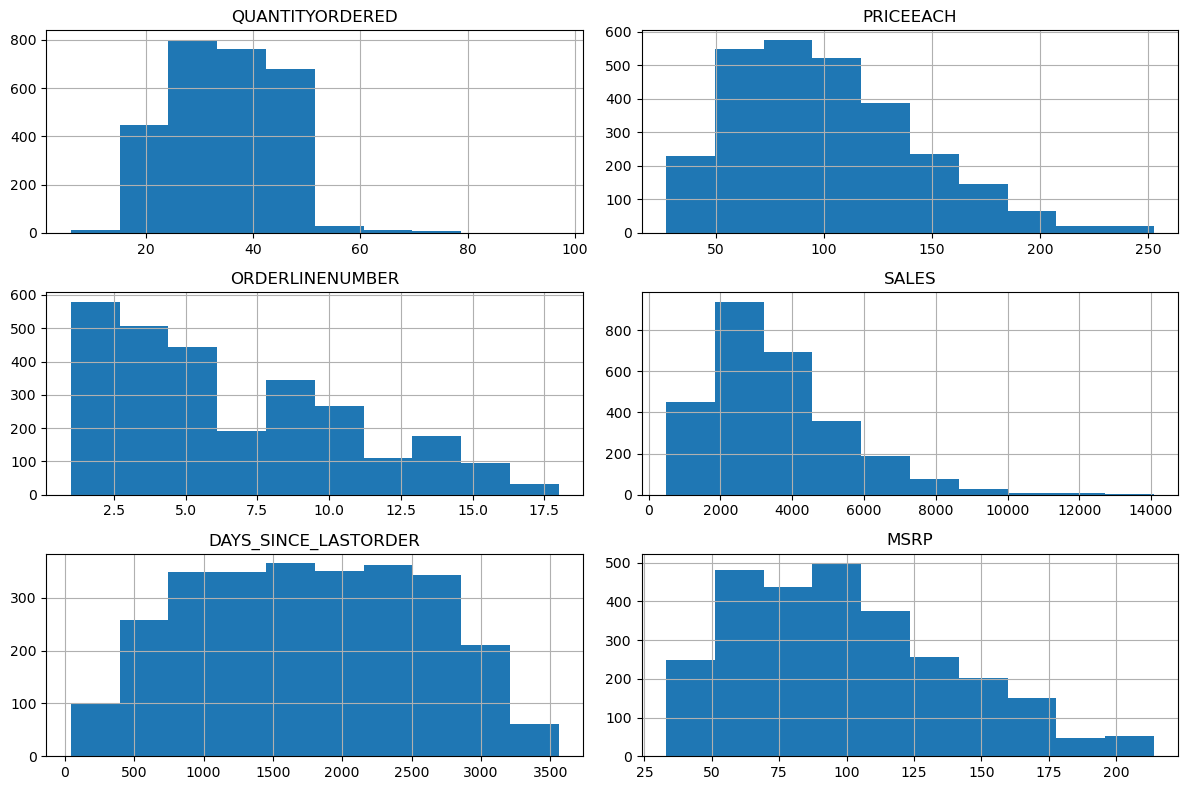

In [20]:
# histograms for numerical features
df_numerical.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

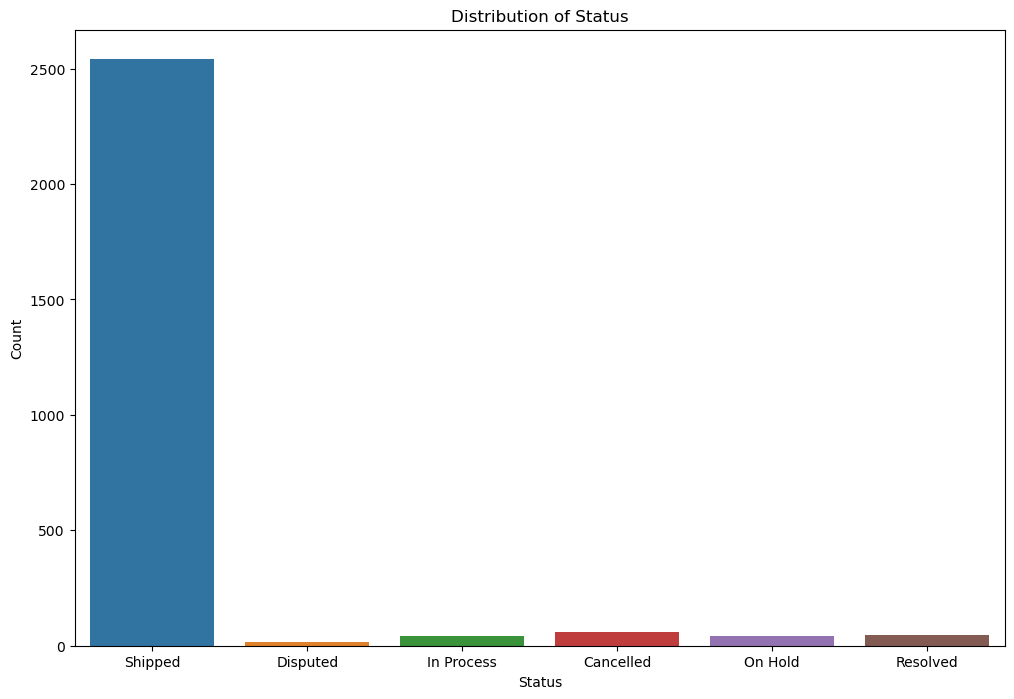

In [21]:
# Distribution of Status
plt.figure(figsize=(12, 8))
sns.countplot(x='STATUS', data=df_cats)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

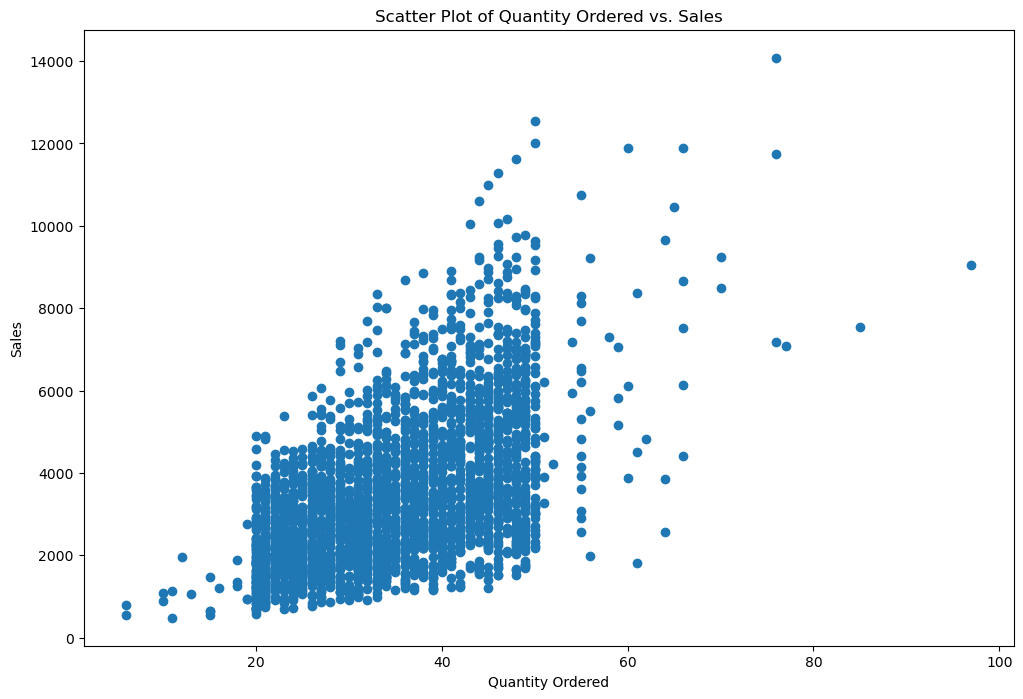

In [22]:
# Scatter Plot of Quantity Ordered vs Sales
plt.figure(figsize=(12, 8))
plt.scatter(df['QUANTITYORDERED'], df['SALES'])
plt.title('Scatter Plot of Quantity Ordered vs. Sales')
plt.xlabel('Quantity Ordered')
plt.ylabel('Sales')
plt.show()

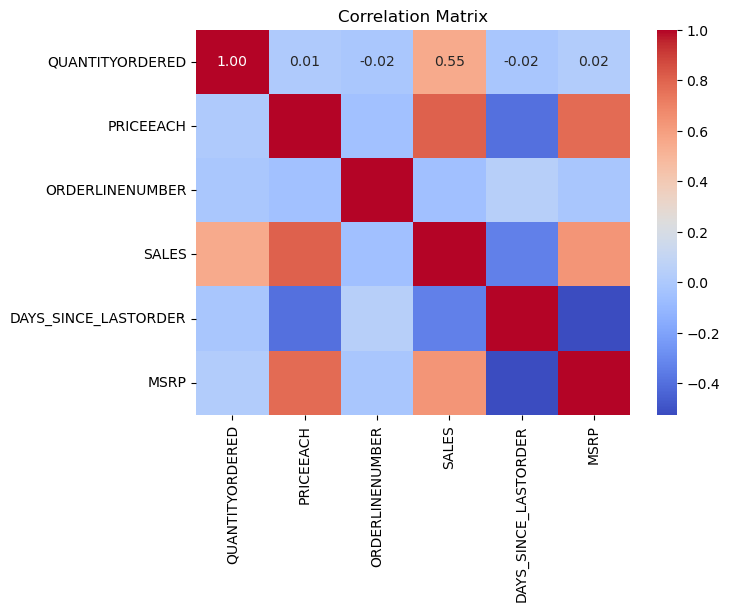

In [23]:
# correlation matrix as a heatmap

correlation_matrix = df_numerical.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

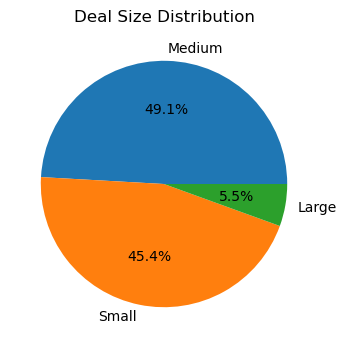

In [24]:
# pie chart for deal size distribution
plt.figure(figsize=(4, 4))
df['DEALSIZE'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Deal Size Distribution')
plt.ylabel('')
plt.show()

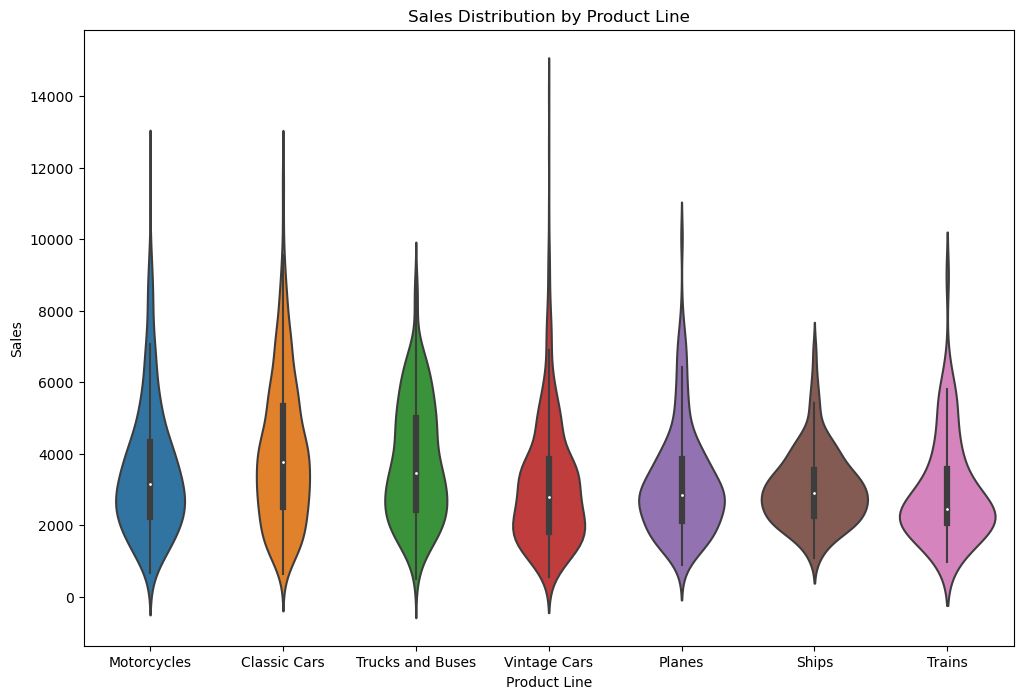

In [25]:
# violin plots for comparative analysis betweeen sales and product line
plt.figure(figsize=(12, 8))
sns.violinplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.show()

/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in 

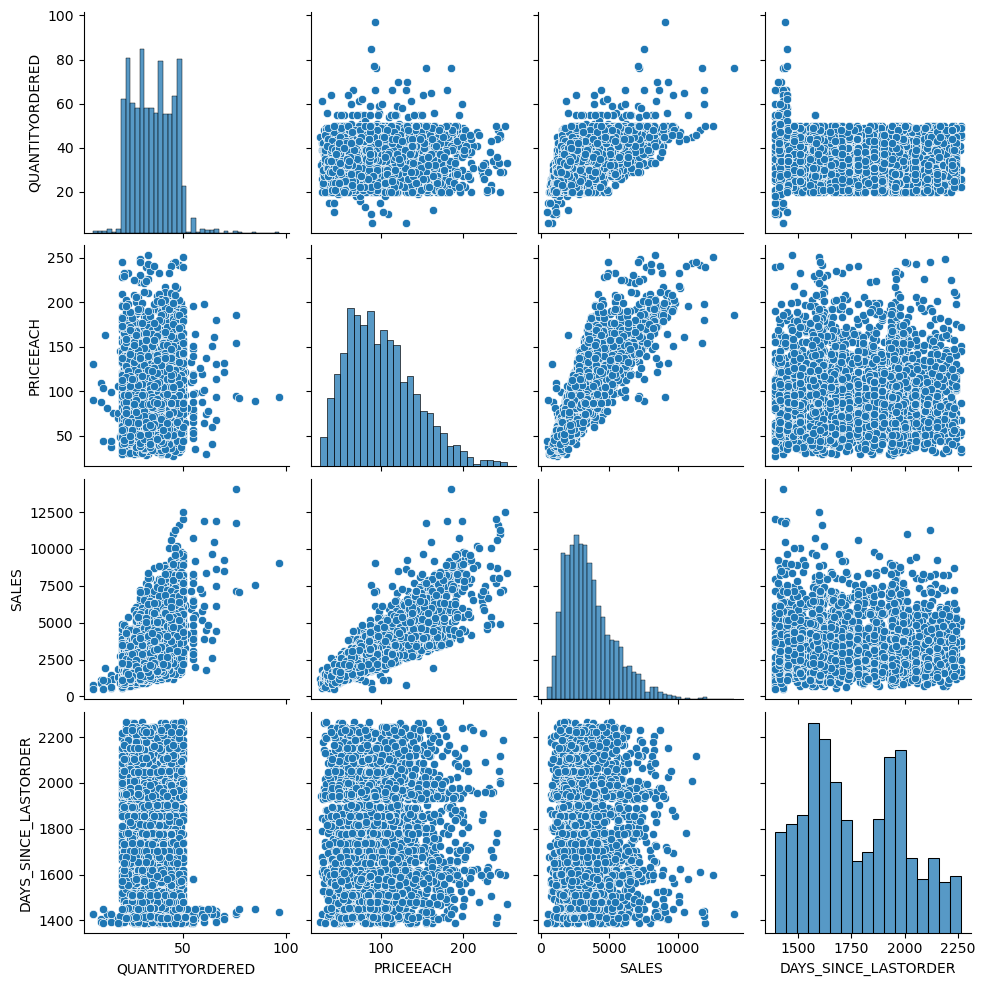

In [26]:
sns.pairplot(df[['QUANTITYORDERED','PRICEEACH','SALES','DAYS_SINCE_LASTORDER']])
plt.show()

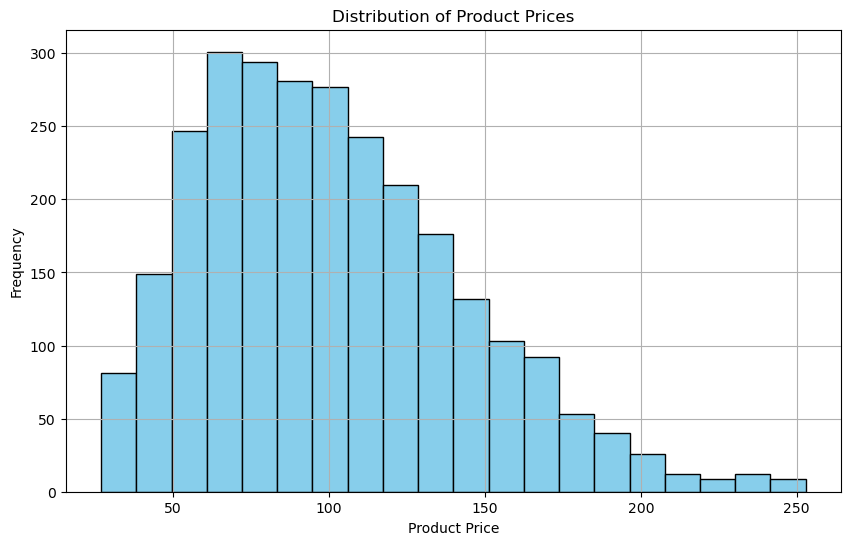

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(df['PRICEEACH'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Product Prices')
plt.xlabel('Product Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

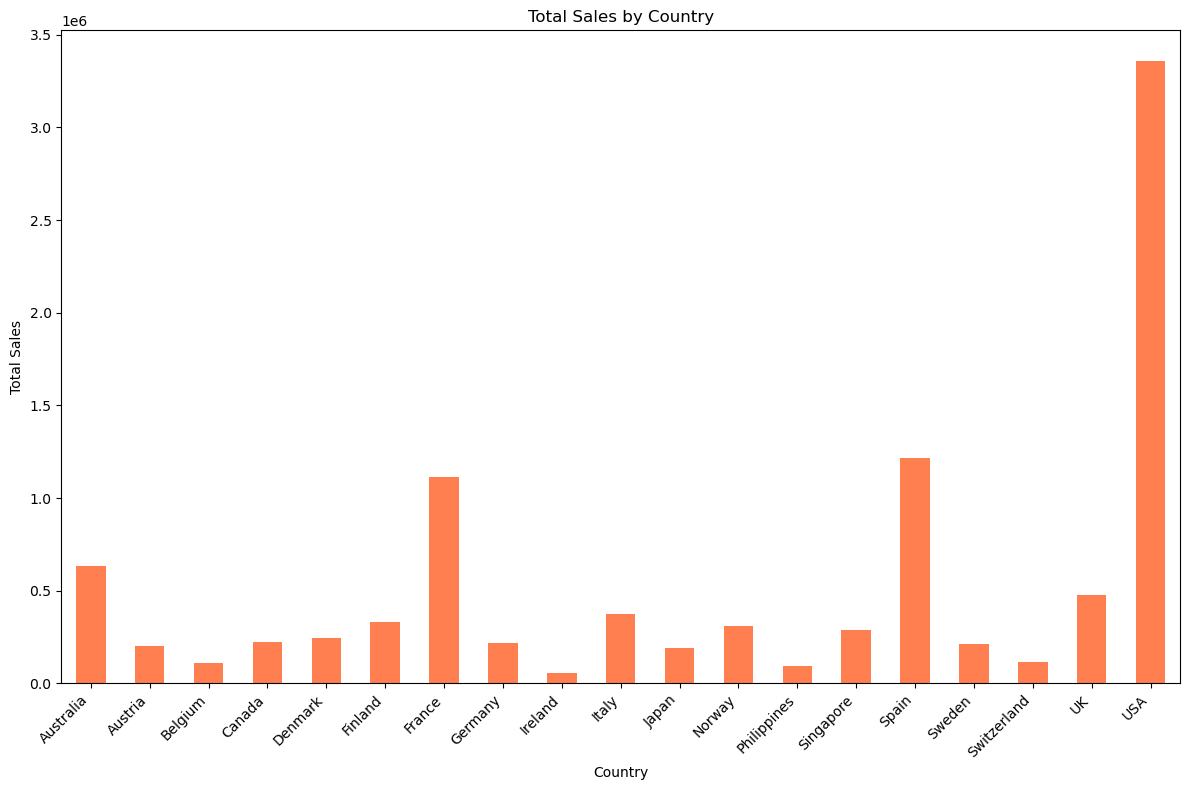

In [28]:
total_sales_by_country = df.groupby('COUNTRY')['SALES'].sum()
plt.figure(figsize=(12, 8))
total_sales_by_country.plot(kind='bar', color='coral')
plt.title('Total Sales by Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

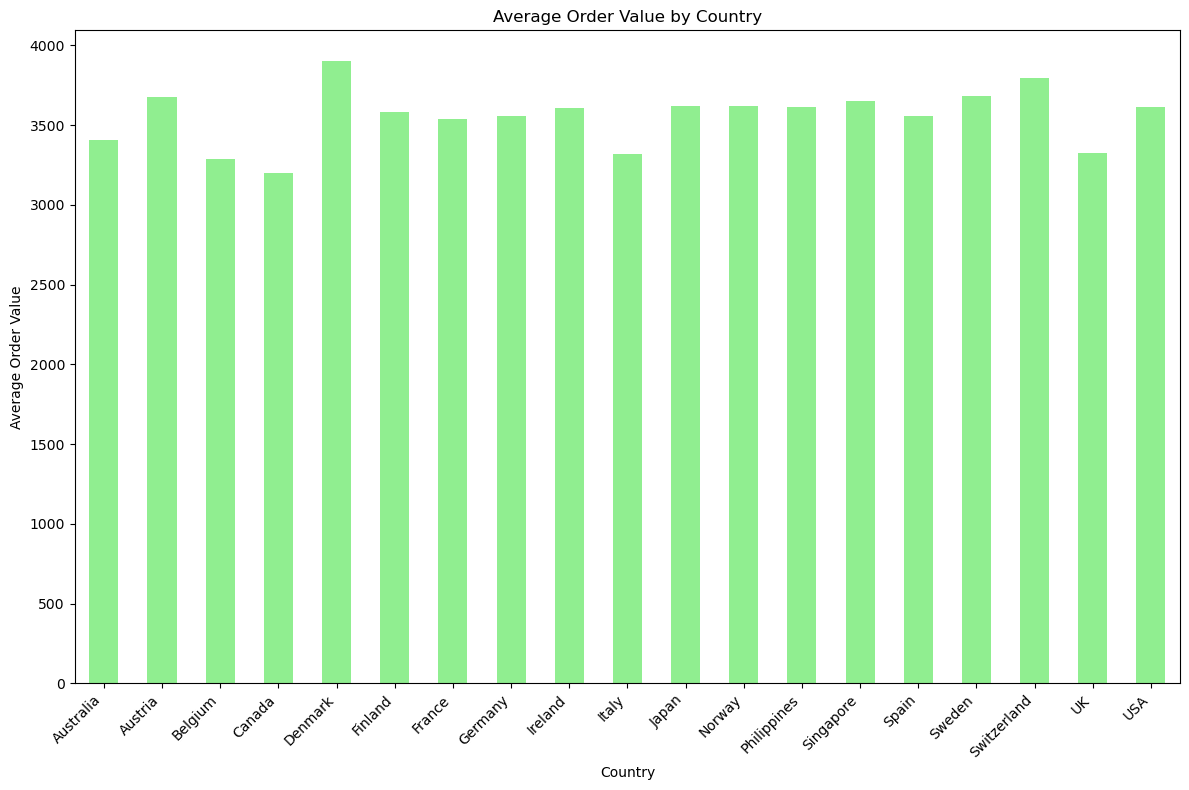

In [29]:
avg_order_value_by_country = df.groupby('COUNTRY')['SALES'].mean()
plt.figure(figsize=(12, 8))
avg_order_value_by_country.plot(kind='bar', color='lightgreen')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

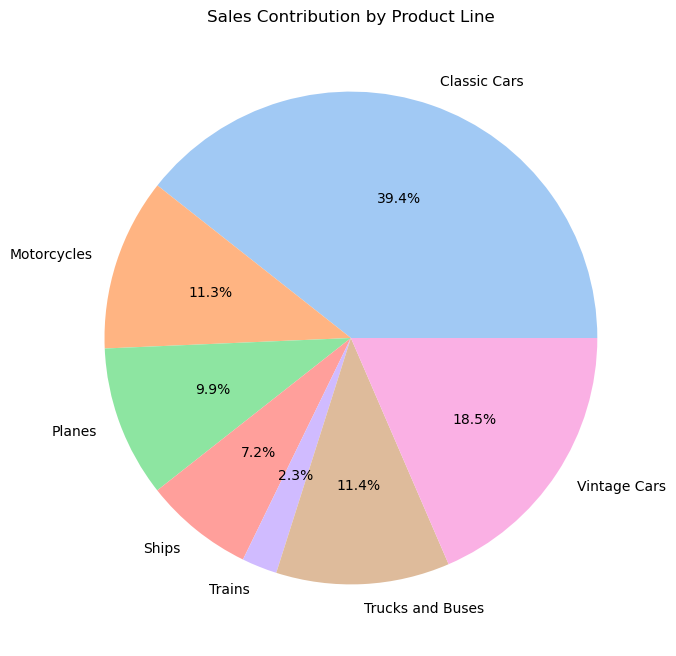

In [30]:
total_sales_by_product_line = df.groupby('PRODUCTLINE')['SALES'].sum()
sales_contribution_by_product_line = total_sales_by_product_line / df['SALES'].sum() * 100

plt.figure(figsize=(8, 8))
sales_contribution_by_product_line.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Sales Contribution by Product Line')
plt.ylabel('')
plt.show()

<Figure size 1200x800 with 0 Axes>

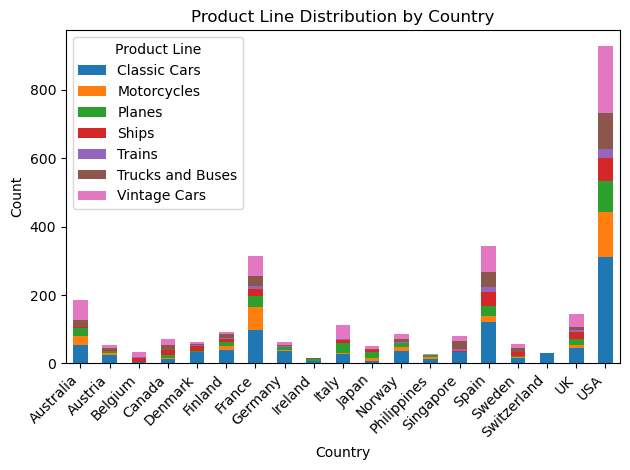

In [31]:
# Pivot table to get product line distribution by country
product_line_distribution = df.pivot_table(index='COUNTRY', columns='PRODUCTLINE', values='SALES', aggfunc='count')

plt.figure(figsize=(12, 8))
product_line_distribution.plot(kind='bar', stacked=True)
plt.title('Product Line Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Line')
plt.tight_layout()
plt.show()


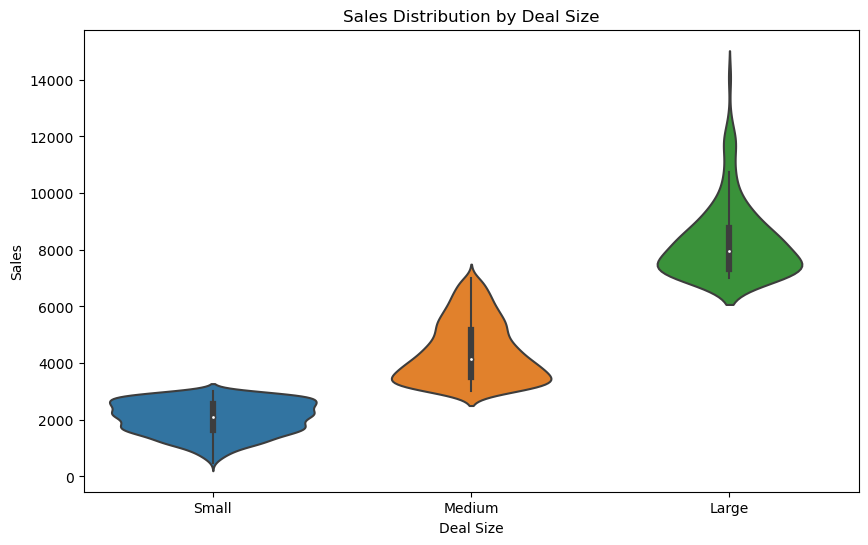

In [32]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='DEALSIZE', y='SALES', data=df)
plt.title('Sales Distribution by Deal Size')
plt.xlabel('Deal Size')
plt.ylabel('Sales')
plt.show()

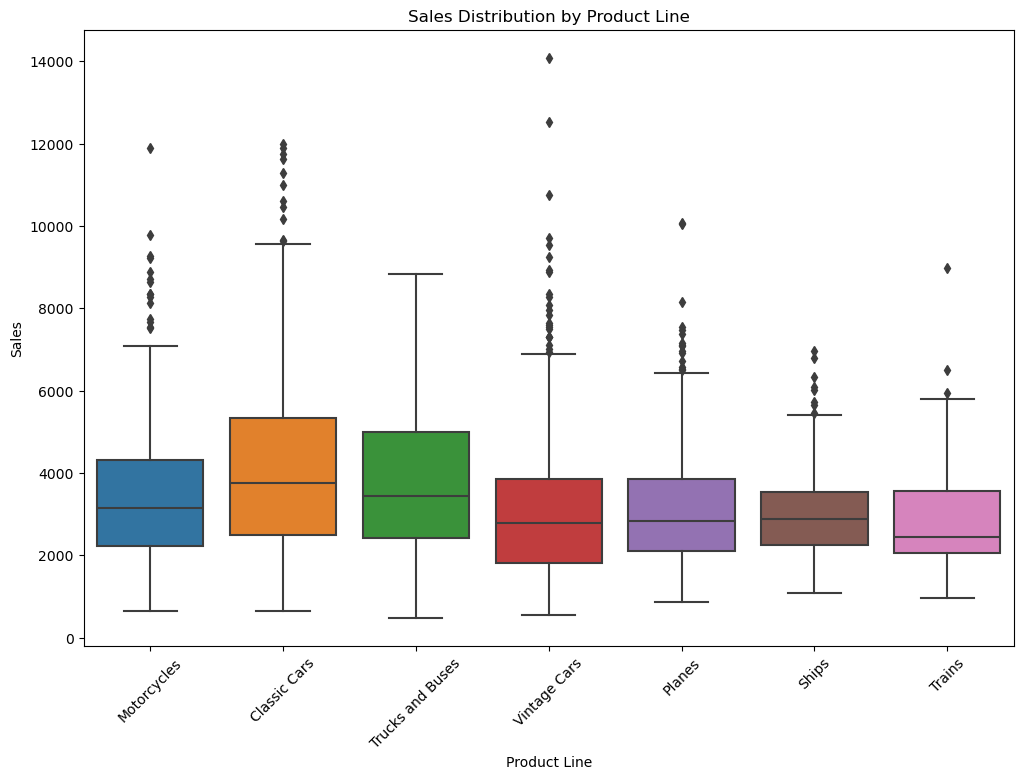

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='PRODUCTLINE', y='SALES', data=df)
plt.title('Sales Distribution by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

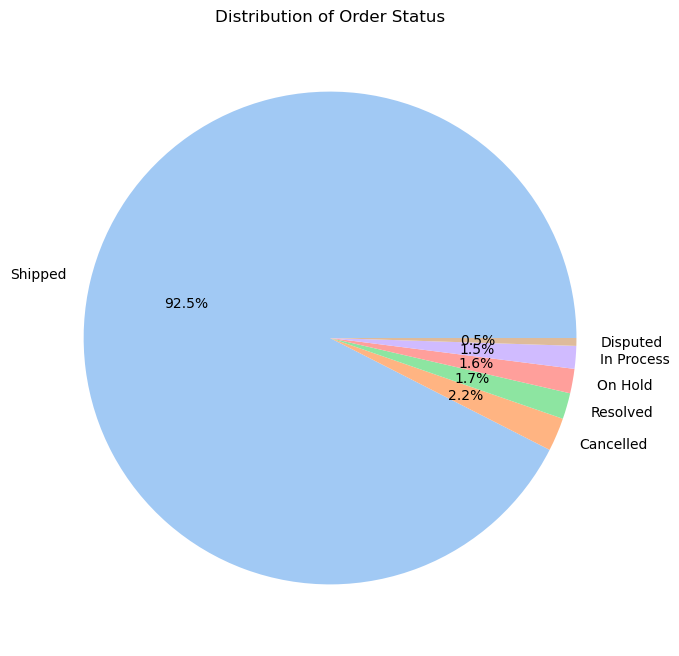

In [34]:
plt.figure(figsize=(8, 8))
df['STATUS'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Order Status')
plt.ylabel('')
plt.show()

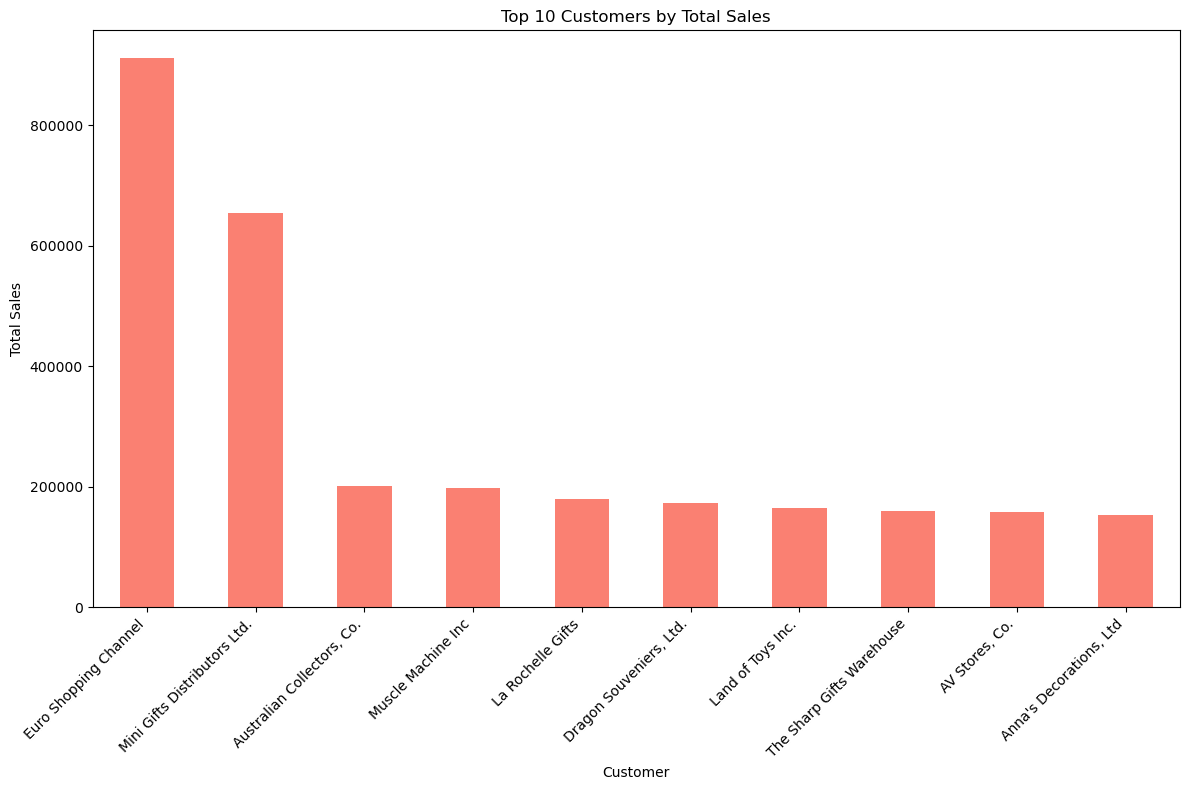

In [35]:
total_sales_by_customer = df.groupby('CUSTOMERNAME')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
total_sales_by_customer.head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Customers by Total Sales')
plt.xlabel('Customer')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


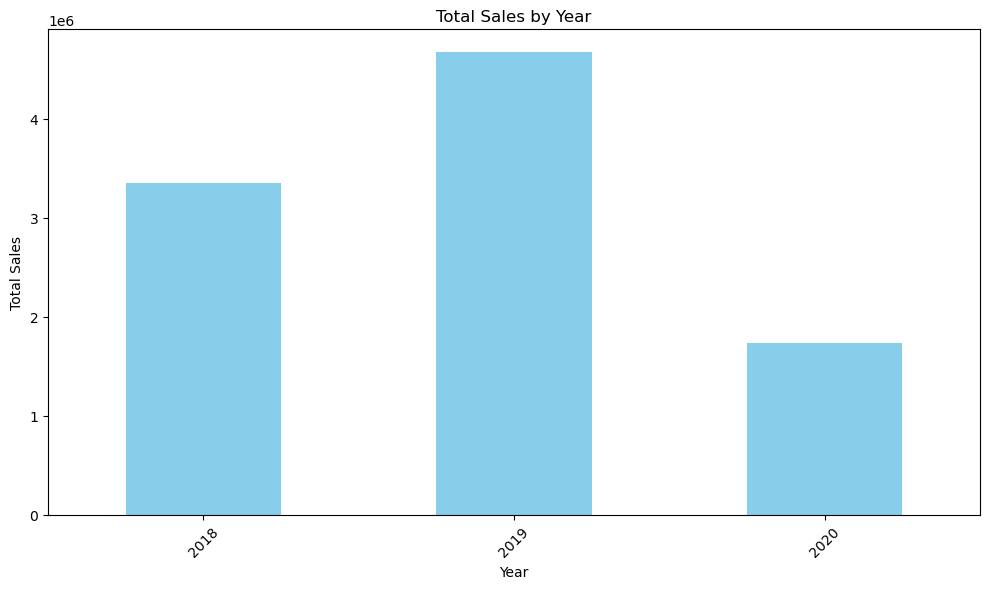

In [36]:
df['ORDER_YEAR'] = df['ORDERDATE'].dt.year
total_sales_by_year = df.groupby('ORDER_YEAR')['SALES'].sum()

plt.figure(figsize=(10, 6))
total_sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


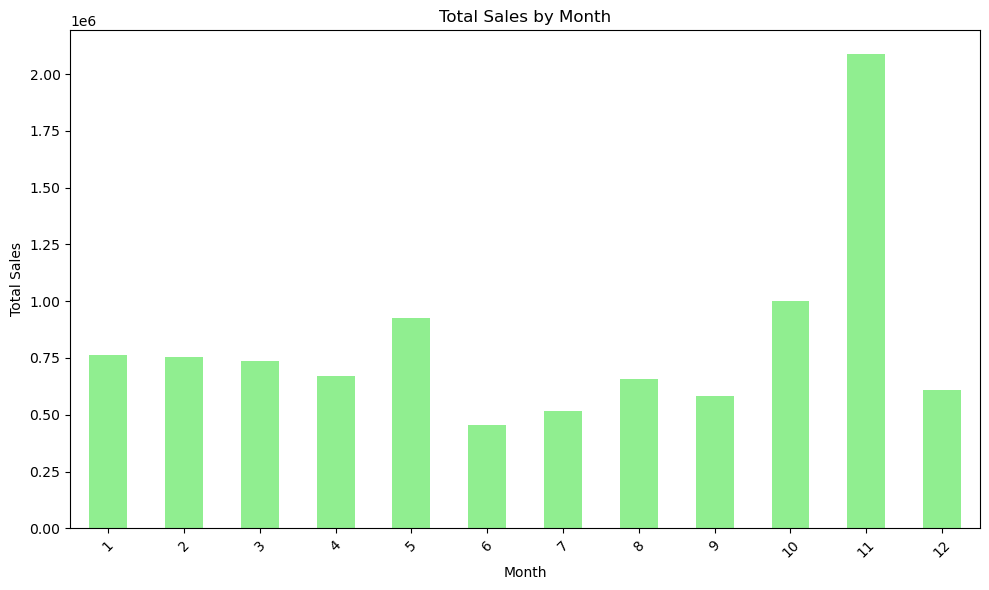

In [37]:
total_sales_by_month = df.groupby('ORDER_MONTH')['SALES'].sum()

plt.figure(figsize=(10, 6))
total_sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


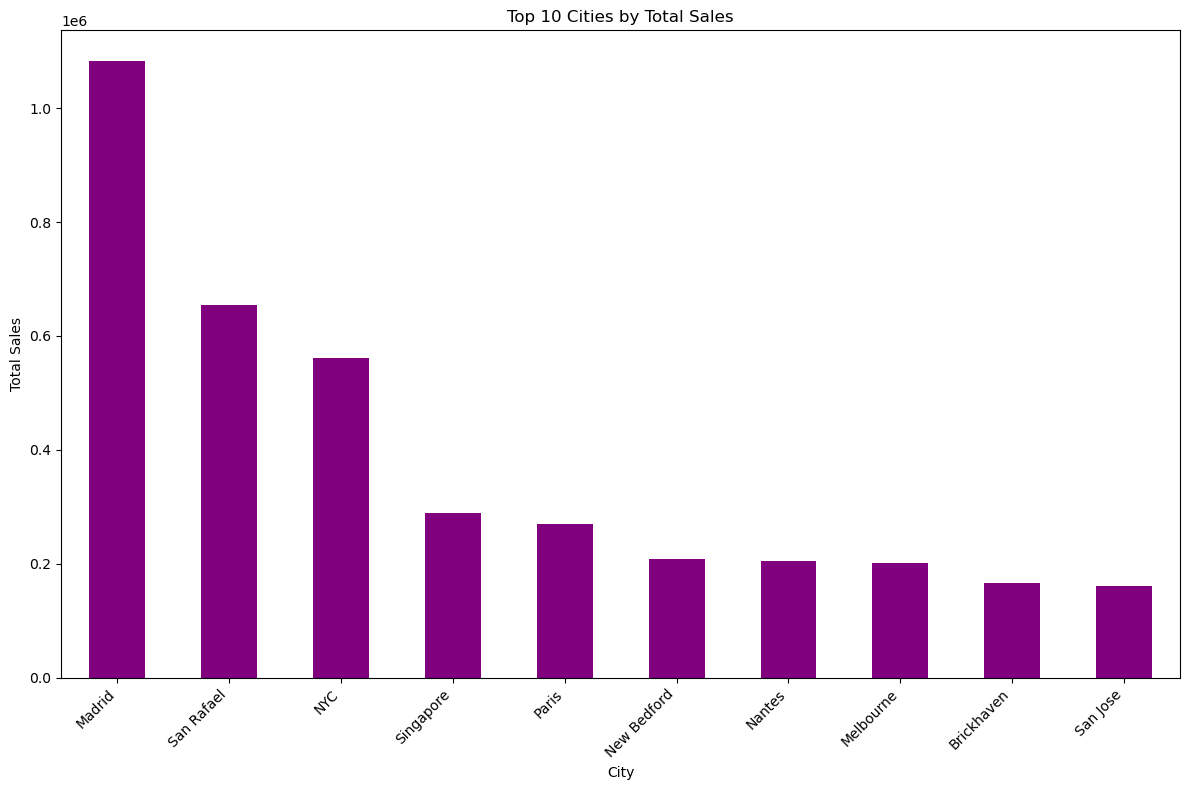

In [38]:
total_sales_by_city = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
total_sales_by_city.head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Cities by Total Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


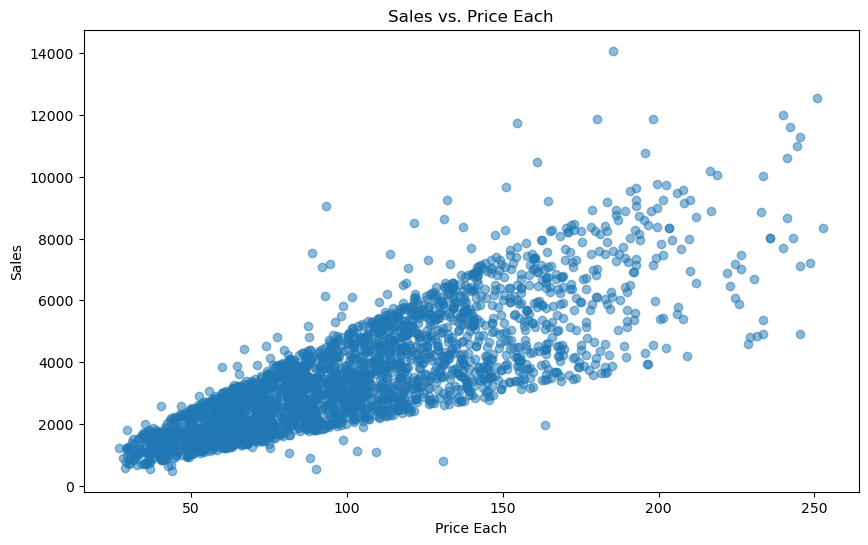

In [39]:
# Plot scatter plot for sales vs. price each
plt.figure(figsize=(10, 6))
plt.scatter(df['PRICEEACH'], df['SALES'], alpha=0.5)
plt.title('Sales vs. Price Each')
plt.xlabel('Price Each')
plt.ylabel('Sales')
plt.show()


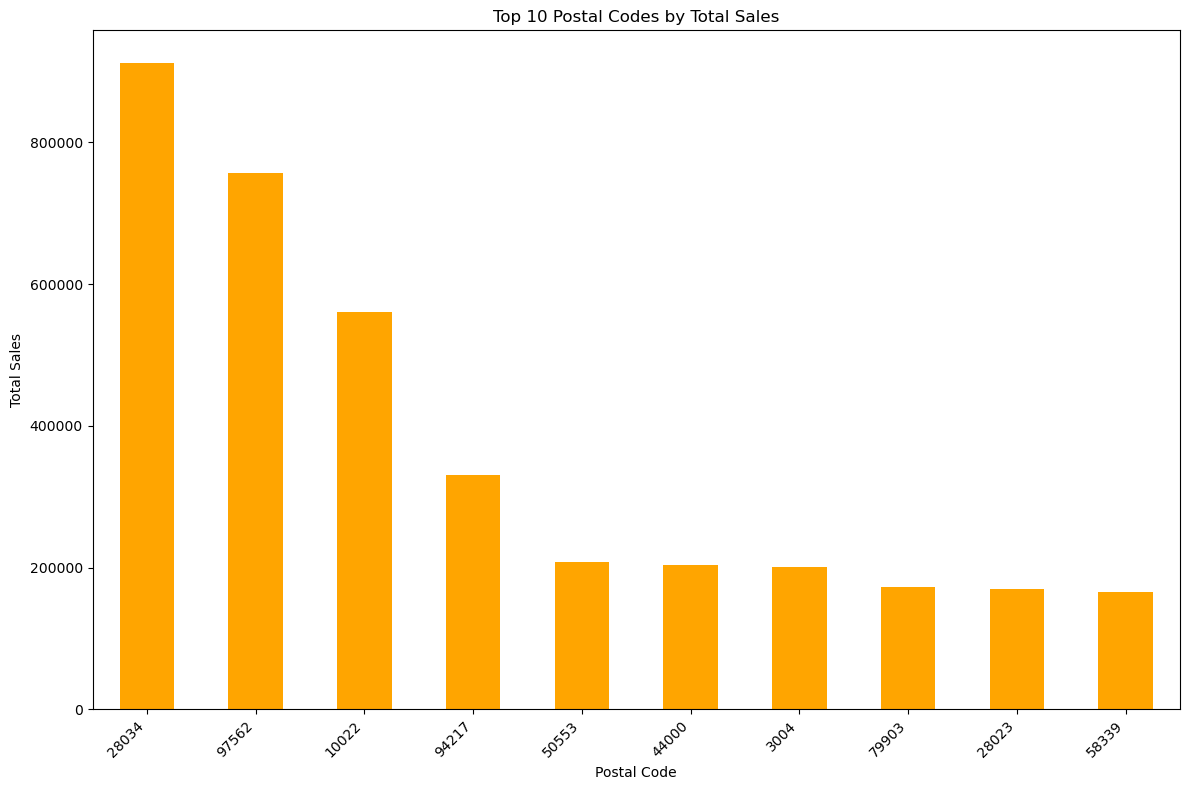

In [40]:
total_sales_by_postal_code = df.groupby('POSTALCODE')['SALES'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
total_sales_by_postal_code.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Postal Codes by Total Sales')
plt.xlabel('Postal Code')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


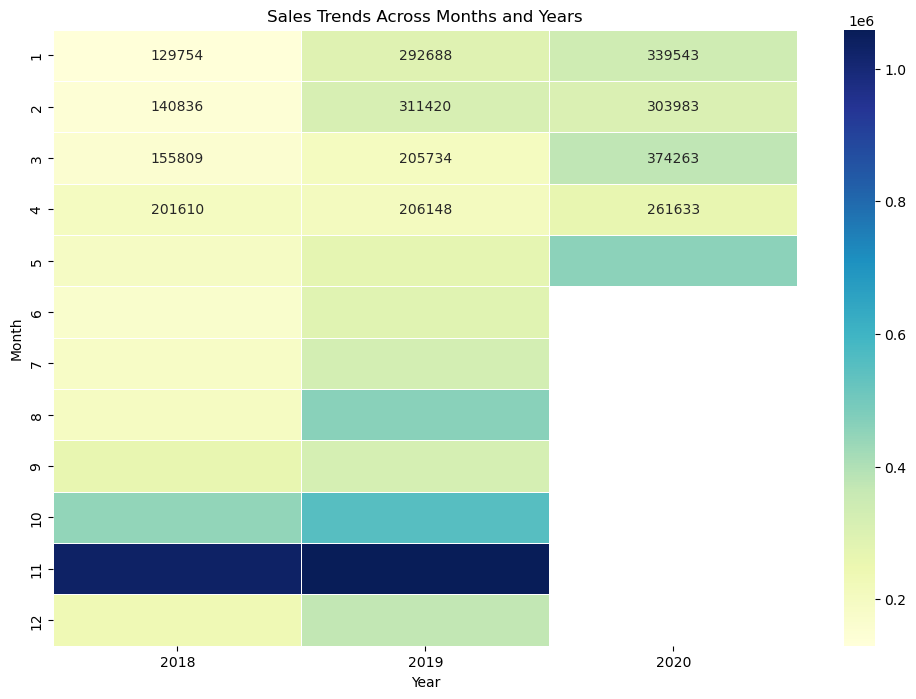

In [41]:
sales_trends_pivot = df.pivot_table(index='ORDER_MONTH', columns='ORDER_YEAR', values='SALES', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_trends_pivot, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=0.5)
plt.title('Sales Trends Across Months and Years')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


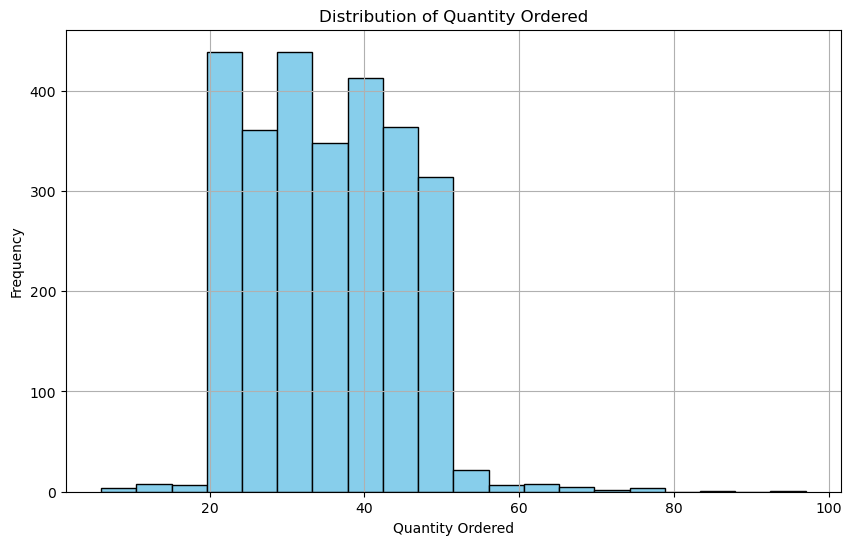

In [42]:
# Plot histogram for quantity ordered
plt.figure(figsize=(10, 6))
plt.hist(df['QUANTITYORDERED'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Quantity Ordered')
plt.xlabel('Quantity Ordered')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


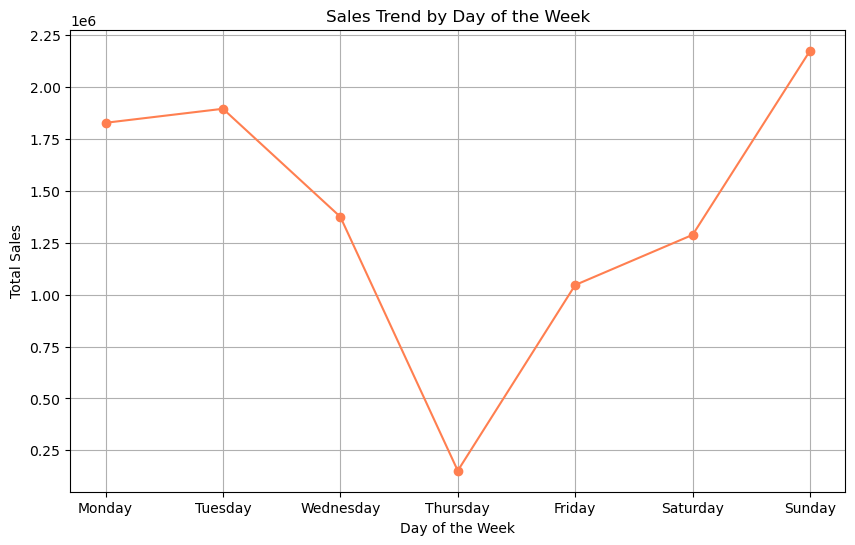

In [43]:
df['ORDER_DAY_OF_WEEK'] = df['ORDERDATE'].dt.dayofweek
total_sales_by_dayofweek = df.groupby('ORDER_DAY_OF_WEEK')['SALES'].sum()

plt.figure(figsize=(10, 6))
total_sales_by_dayofweek.plot(kind='line', marker='o', color='coral')
plt.title('Sales Trend by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.show()


## RFM (Recency, Frequency, Monetary) Analysis   

In [44]:
df.head(2)

QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER   SALES  ORDERDATE   STATUS  \
0               30      95.70                2  2871.0 2018-02-24  Shipped   
1               34      81.35                5  2765.9 2018-05-07  Shipped   

   PRODUCTLINE  MSRP PRODUCTCODE        CUSTOMERNAME   CITY POSTALCODE  \
0  Motorcycles    95    S10_1678   Land of Toys Inc.    NYC      10022   
1  Motorcycles    95    S10_1678  Reims Collectables  Reims      51100   

  COUNTRY DEALSIZE  DAYS_SINCE_LASTORDER  ORDER_MONTH  ORDER_DAY  ORDER_YEAR  \
0     USA    Small                  2217            2         24        2018   
1  France    Small                  2145            5          7        2018   

   ORDER_DAY_OF_WEEK  
0                  5  
1                  0

In [45]:
df['ORDER_DAY_OF_WEEK']=df['ORDERDATE'].dt.day_name()

FOR RFM ANALYSIS:

"SALES" column is for "monetory"

"ORDERDATE" column is for "recency"

"QUANTITYORDERED" column is for "frequency"

In [46]:
df_rfm=df.copy()
df_rfm['ORDERDATE']=pd.to_datetime(df_rfm['ORDERDATE'])
df_rfm.rename(columns={'DAYS_SINCE_LASTORDER': 'RECENCY'}, inplace=True)
df_rfm.rename(columns={"QUANTITYORDERED":"FREQUENCY",'SALES':"MONETARY"},inplace=True)

In [47]:
df_rfm.head()

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY  ORDERDATE   STATUS  \
0         30      95.70                2   2871.00 2018-02-24  Shipped   
1         34      81.35                5   2765.90 2018-05-07  Shipped   
2         41      94.74                2   3884.34 2018-07-01  Shipped   
3         45      83.26                6   3746.70 2018-08-25  Shipped   
4         36      96.66                1   3479.76 2018-10-28  Shipped   

   PRODUCTLINE  MSRP PRODUCTCODE          CUSTOMERNAME        CITY POSTALCODE  \
0  Motorcycles    95    S10_1678     Land of Toys Inc.         NYC      10022   
1  Motorcycles    95    S10_1678    Reims Collectables       Reims      51100   
2  Motorcycles    95    S10_1678       Lyon Souveniers       Paris      75508   
3  Motorcycles    95    S10_1678     Toys4GrownUps.com    Pasadena      90003   
4  Motorcycles    95    S10_1678  Technics Stores Inc.  Burlingame      94217   

  COUNTRY DEALSIZE  RECENCY  ORDER_MONTH  ORDER_DAY  ORDER_YEAR  \
0     USA    Small     2217            2         24        2018   
1  France    Small     2145            5          7        2018   
2  France   Medium     2090            7          1        2018   
3     USA   Medium     2035            8         25        2018   
4     USA   Medium     1971           10         28        2018   

  ORDER_DAY_OF_WEEK  
0          Saturday  
1            Monday  
2            Sunday  
3          Saturday  
4            Sunday

/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


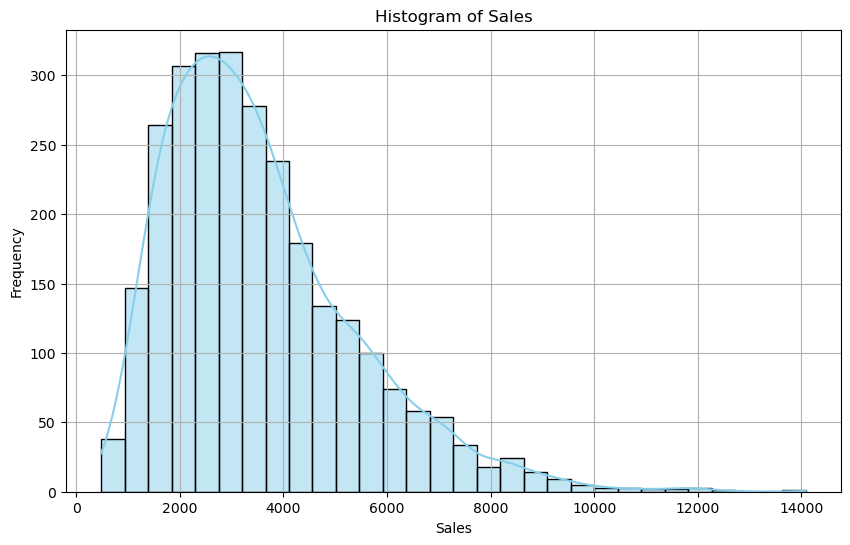

Skewness 1.1553084908947713
Kurtosis 1.767690983161713


In [48]:
from scipy.stats import skew, kurtosis

plt.figure(figsize=(10, 6))
sns.histplot(df_rfm['MONETARY'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

sales_skewness = skew(df_rfm['MONETARY'])
sales_kurtosis = kurtosis(df_rfm['MONETARY'])

print("Skewness", sales_skewness)
print("Kurtosis", sales_kurtosis)

Sales distribution is right-skewed, it indicates that most sales transactions have lower values, while a small number of transactions have significantly higher values. This could imply that there are a few large sales transactions that contribute disproportionately to the total sales, while the majority of transactions are smaller in value.

In [49]:
# top 5 customers by RFM analysis
df_rfm.groupby('CUSTOMERNAME').agg({
    'FREQUENCY':'count',
    "MONETARY":'sum',
    'RECENCY':'min'
}).head(5)

FREQUENCY   MONETARY  RECENCY
CUSTOMERNAME                                          
AV Stores, Co.                  51  157807.81     1586
Alpha Cognac                    20   70488.44     1454
Amica Models & Co.              26   94117.26     1655
Anna's Decorations, Ltd         46  153996.13     1473
Atelier graphique                7   24179.96     1578

In [50]:
# creating separate bins for recency, frequency and monetory columns and capturing their scores into the dataframe

recency=pd.qcut(df_rfm['RECENCY'],q=5,labels=range(1,6)).astype(str)
frequency=pd.qcut(df_rfm['FREQUENCY'],q=5,labels=range(1,6)).astype(str)
monetary=pd.qcut(df_rfm['MONETARY'],q=5,labels=range(1,6)).astype(str)

df_rfm['RECENCY_SCORE']=recency
df_rfm['RECENCY_SCORE']=df_rfm['RECENCY_SCORE'].astype(int)
df_rfm['FREQUENCY_SCORE']=frequency
df_rfm['FREQUENCY_SCORE']=df_rfm['FREQUENCY_SCORE'].astype(int)
df_rfm['MONETARY_SCORE']=monetary
df_rfm['MONETARY_SCORE']=df_rfm['MONETARY_SCORE'].astype(int)

In [51]:
df_rfm['RFM_SCORE']=df_rfm['RECENCY_SCORE']+df_rfm['FREQUENCY_SCORE']+df_rfm['MONETARY_SCORE']

In [52]:
df_rfm.head()

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY  ORDERDATE   STATUS  \
0         30      95.70                2   2871.00 2018-02-24  Shipped   
1         34      81.35                5   2765.90 2018-05-07  Shipped   
2         41      94.74                2   3884.34 2018-07-01  Shipped   
3         45      83.26                6   3746.70 2018-08-25  Shipped   
4         36      96.66                1   3479.76 2018-10-28  Shipped   

   PRODUCTLINE  MSRP PRODUCTCODE          CUSTOMERNAME  ... DEALSIZE RECENCY  \
0  Motorcycles    95    S10_1678     Land of Toys Inc.  ...    Small    2217   
1  Motorcycles    95    S10_1678    Reims Collectables  ...    Small    2145   
2  Motorcycles    95    S10_1678       Lyon Souveniers  ...   Medium    2090   
3  Motorcycles    95    S10_1678     Toys4GrownUps.com  ...   Medium    2035   
4  Motorcycles    95    S10_1678  Technics Stores Inc.  ...   Medium    1971   

  ORDER_MONTH ORDER_DAY  ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  \
0           2        24        2018           Saturday              5   
1           5         7        2018             Monday              5   
2           7         1        2018             Sunday              5   
3           8        25        2018           Saturday              5   
4          10        28        2018             Sunday              4   

   FREQUENCY_SCORE MONETARY_SCORE  RFM_SCORE  
0                2              3         10  
1                3              2         10  
2                4              4         13  
3                4              4         13  
4                3              3         10  

[5 rows x 23 columns]

In [53]:
df_rfm['RFM_SCORE'].describe()

count    2747.000000
mean        8.881325
std         2.814184
min         3.000000
25%         7.000000
50%         9.000000
75%        11.000000
max        15.000000
Name: RFM_SCORE, dtype: float64

In [54]:
# Segmenting customers based on RFM scores
def segment_customers(rfm_score):
    if rfm_score >= 9:
        return 'High Value'
    elif rfm_score >= 6:
        return 'Medium Value'
    else:
        return 'Low Value'

df_rfm['SEGMENT'] = df_rfm['RFM_SCORE'].apply(segment_customers)

segment_analysis = df_rfm.groupby('SEGMENT').agg({
    'FREQUENCY': 'mean',
    'MONETARY': 'mean',
    'RECENCY': 'mean'
}).reset_index()

print("Segment Analysis:")
print(segment_analysis)


Segment Analysis:
        SEGMENT  FREQUENCY     MONETARY      RECENCY
0    High Value  40.725861  4590.402282  1839.752194
1     Low Value  24.168168  1797.770991  1564.873874
2  Medium Value  30.080386  2532.881233  1741.576635


In [55]:
df_rfm.head()

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY  ORDERDATE   STATUS  \
0         30      95.70                2   2871.00 2018-02-24  Shipped   
1         34      81.35                5   2765.90 2018-05-07  Shipped   
2         41      94.74                2   3884.34 2018-07-01  Shipped   
3         45      83.26                6   3746.70 2018-08-25  Shipped   
4         36      96.66                1   3479.76 2018-10-28  Shipped   

   PRODUCTLINE  MSRP PRODUCTCODE          CUSTOMERNAME  ... RECENCY  \
0  Motorcycles    95    S10_1678     Land of Toys Inc.  ...    2217   
1  Motorcycles    95    S10_1678    Reims Collectables  ...    2145   
2  Motorcycles    95    S10_1678       Lyon Souveniers  ...    2090   
3  Motorcycles    95    S10_1678     Toys4GrownUps.com  ...    2035   
4  Motorcycles    95    S10_1678  Technics Stores Inc.  ...    1971   

  ORDER_MONTH ORDER_DAY ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  \
0           2        24       2018           Saturday              5   
1           5         7       2018             Monday              5   
2           7         1       2018             Sunday              5   
3           8        25       2018           Saturday              5   
4          10        28       2018             Sunday              4   

   FREQUENCY_SCORE  MONETARY_SCORE RFM_SCORE     SEGMENT  
0                2               3        10  High Value  
1                3               2        10  High Value  
2                4               4        13  High Value  
3                4               4        13  High Value  
4                3               3        10  High Value  

[5 rows x 24 columns]

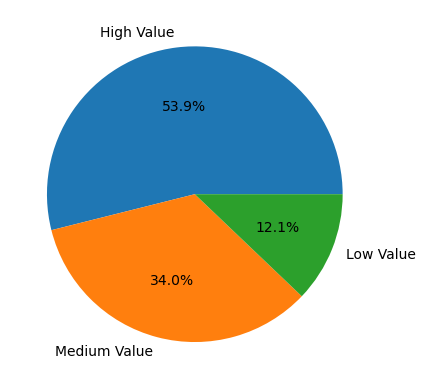

In [56]:
plt.pie(df_rfm['SEGMENT'].value_counts(),labels=df_rfm['SEGMENT'].value_counts().index,autopct='%1.1f%%')
plt.show()

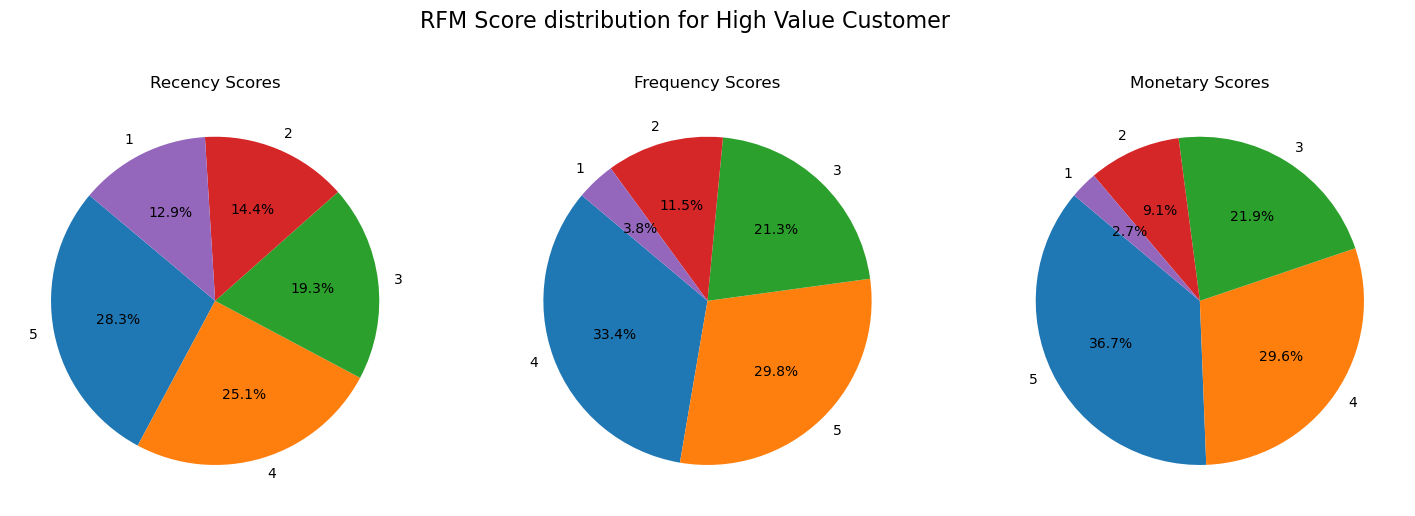

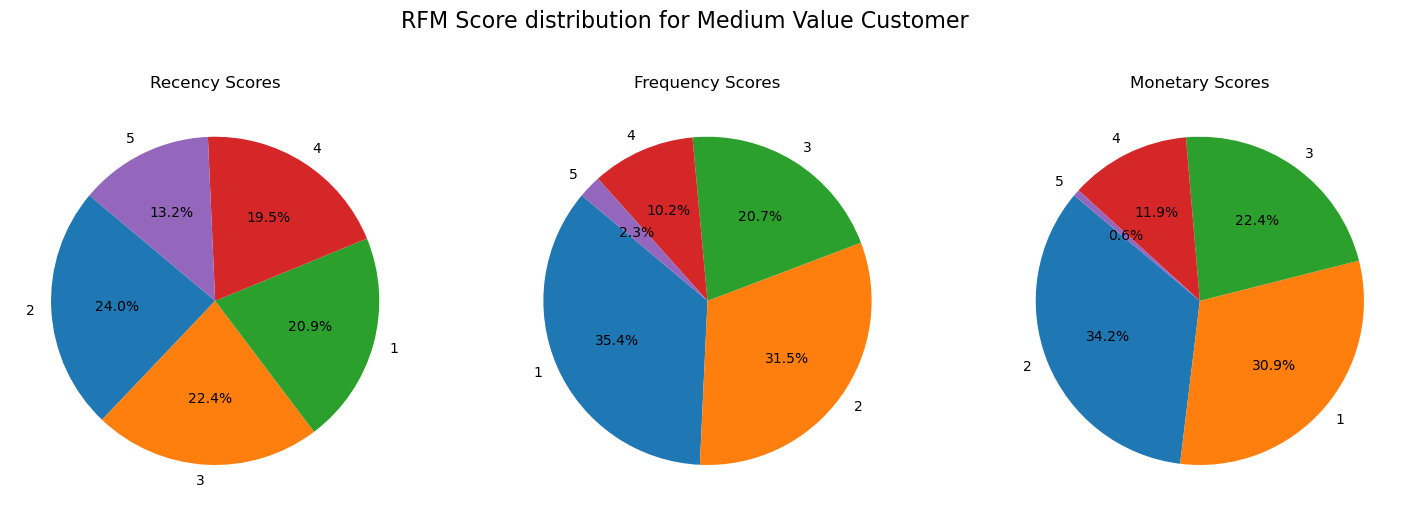

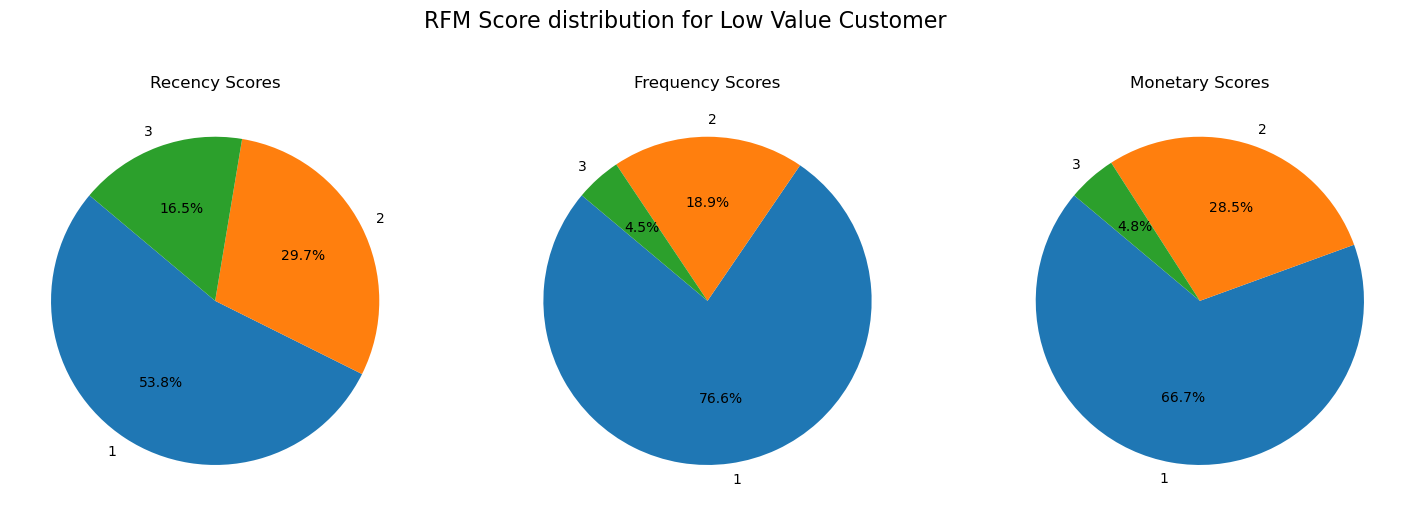

In [57]:
def plot_pie_charts(segment_df, segment_name):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    recency_counts = segment_df['RECENCY_SCORE'].value_counts()
    axes[0].pie(recency_counts, labels=recency_counts.index, autopct='%1.1f%%', startangle=140)
    axes[0].set_title('Recency Scores')

    frequency_counts = segment_df['FREQUENCY_SCORE'].value_counts()
    axes[1].pie(frequency_counts, labels=frequency_counts.index, autopct='%1.1f%%', startangle=140)
    axes[1].set_title('Frequency Scores')

    monetary_counts = segment_df['MONETARY_SCORE'].value_counts()
    axes[2].pie(monetary_counts, labels=monetary_counts.index, autopct='%1.1f%%', startangle=140)
    axes[2].set_title('Monetary Scores')
    
    plt.suptitle('RFM Score distribution for {} Customer'.format(segment_name), fontsize=16)
    plt.show()

high_value_segment = df_rfm[df_rfm['SEGMENT'] == 'High Value']
medium_value_segment = df_rfm[df_rfm['SEGMENT'] == 'Medium Value']
low_value_segment = df_rfm[df_rfm['SEGMENT'] == 'Low Value']
plot_pie_charts(high_value_segment, "High Value")
plot_pie_charts(medium_value_segment, "Medium Value")
plot_pie_charts(low_value_segment, "Low Value")

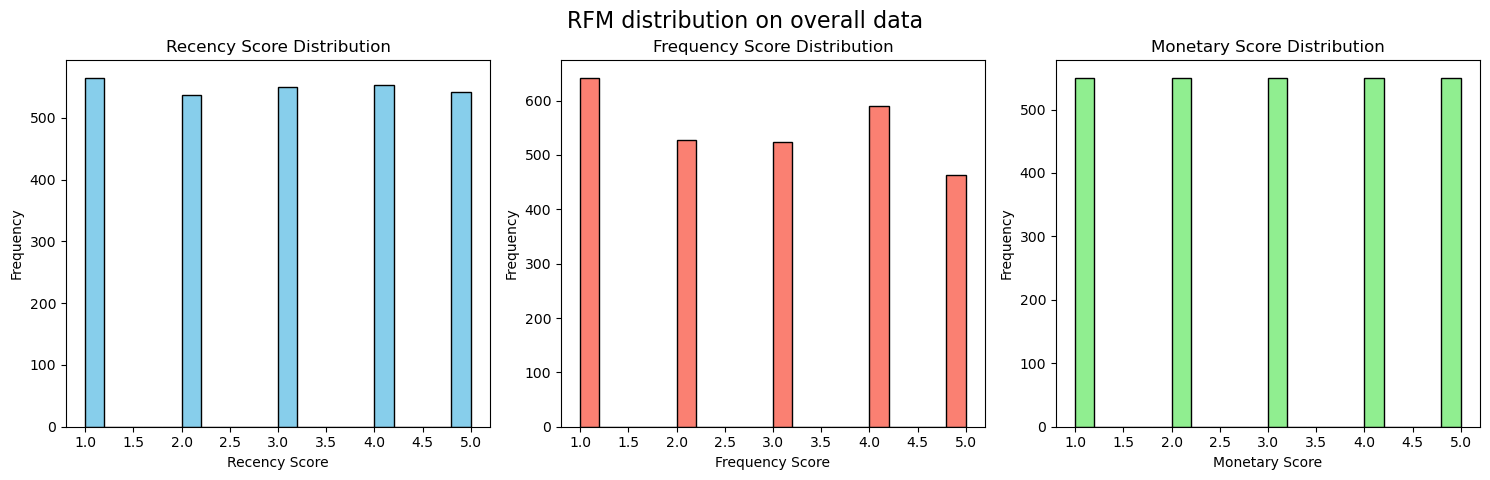

In [58]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(x='RECENCY_SCORE', bins=20, data=df_rfm, color='skyblue', edgecolor='black')
axes[0].set_title('Recency Score Distribution')
axes[0].set_xlabel('Recency Score')
axes[0].set_ylabel('Frequency')

axes[1].hist(x='FREQUENCY_SCORE', bins=20, data=df_rfm, color='salmon', edgecolor='black')
axes[1].set_title('Frequency Score Distribution')
axes[1].set_xlabel('Frequency Score')
axes[1].set_ylabel('Frequency')

axes[2].hist(x='MONETARY_SCORE', bins=20, data=df_rfm, color='lightgreen', edgecolor='black')
axes[2].set_title('Monetary Score Distribution')
axes[2].set_xlabel('Monetary Score')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle("RFM distribution on overall data", fontsize=16)
plt.show()


## Clustering Analysis

In [59]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
le=LabelEncoder()
df_cluster=df_rfm.copy()
df_rfm_cats=['STATUS','PRODUCTLINE','PRODUCTCODE','CUSTOMERNAME','CITY','COUNTRY','DEALSIZE','ORDER_DAY_OF_WEEK','SEGMENT']
for i in df_rfm_cats:
    df_cluster[i]=df_cluster[i].astype(str)
    df_cluster[i]=le.fit_transform(df_cluster[i].values)
df_cluster.head()

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY  ORDERDATE  STATUS  \
0         30      95.70                2   2871.00 2018-02-24       5   
1         34      81.35                5   2765.90 2018-05-07       5   
2         41      94.74                2   3884.34 2018-07-01       5   
3         45      83.26                6   3746.70 2018-08-25       5   
4         36      96.66                1   3479.76 2018-10-28       5   

   PRODUCTLINE  MSRP  PRODUCTCODE  CUSTOMERNAME  ...  RECENCY ORDER_MONTH  \
0            1    95            0            44  ...     2217           2   
1            1    95            0            63  ...     2145           5   
2            1    95            0            45  ...     2090           7   
3            1    95            0            82  ...     2035           8   
4            1    95            0            76  ...     1971          10   

   ORDER_DAY  ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  FREQUENCY_SCORE  \
0         24        2018                  2              5                2   
1          7        2018                  1              5                3   
2          1        2018                  3              5                4   
3         25        2018                  2              5                4   
4         28        2018                  3              4                3   

   MONETARY_SCORE  RFM_SCORE  SEGMENT  
0               3         10        0  
1               2         10        0  
2               4         13        0  
3               4         13        0  
4               3         10        0  

[5 rows x 24 columns]

In [60]:
ss=StandardScaler()
df_cluster_scaled=ss.fit_transform(df_cluster.drop(columns=['ORDERDATE','POSTALCODE']))
df_cluster_scaled.shape

(2747, 22)

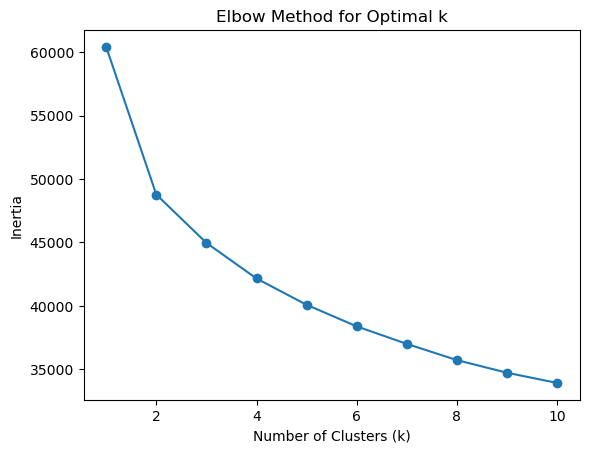

In [61]:
# finding optimum number of clusters
from sklearn.cluster import KMeans

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=10,random_state=42)
    kmeans.fit(df_cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [62]:
# choosing 5 clusters
kmeans = KMeans(n_clusters = 5,random_state = 1)
kmeans.fit(df_cluster_scaled)
cluster_labels = kmeans.labels_
cluster_labels

/Users/sparshikaad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 1, ..., 4, 0, 4], dtype=int32)

In [63]:
df_cluster.columns

Index(['FREQUENCY', 'PRICEEACH', 'ORDERLINENUMBER', 'MONETARY', 'ORDERDATE',
       'STATUS', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'CITY',
       'POSTALCODE', 'COUNTRY', 'DEALSIZE', 'RECENCY', 'ORDER_MONTH',
       'ORDER_DAY', 'ORDER_YEAR', 'ORDER_DAY_OF_WEEK', 'RECENCY_SCORE',
       'FREQUENCY_SCORE', 'MONETARY_SCORE', 'RFM_SCORE', 'SEGMENT'],
      dtype='object')

In [64]:
df_cluster_selected = df_cluster.drop(columns=['ORDERDATE', 'POSTALCODE'])
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=df_cluster_selected.columns)
cluster_centers

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY    STATUS  PRODUCTLINE  \
0  -0.584531   0.042902        -0.009865 -0.365395 -0.220499    -0.031864   
1   0.214386   1.294358        -0.011439  1.183760  0.218175    -0.564153   
2   0.440058  -0.482048         0.118129 -0.245873  0.130374     0.278752   
3  -0.736244  -0.732283         0.014245 -0.899492  0.107264     0.151145   
4   0.999678   0.357627        -0.124944  0.873909 -0.244141     0.020393   

       MSRP  PRODUCTCODE  CUSTOMERNAME      CITY  ...   RECENCY  ORDER_MONTH  \
0  0.126429    -0.135542      0.073475  0.173218  ... -0.975917    -0.384526   
1  1.295463    -0.936088     -0.089743 -0.046398  ...  0.718390     0.128310   
2 -0.478875     0.407461     -0.144720 -0.014233  ...  0.945104    -0.097149   
3 -0.681389     0.393707     -0.033793 -0.085543  ...  0.137225     0.294232   
4  0.192771    -0.019284      0.201209 -0.009652  ... -0.782843    -0.009920   

   ORDER_DAY  ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  FREQUENCY_SCORE  \
0  -0.010142    1.051446          -0.186257      -1.038332        -0.597700   
1  -0.084621   -0.703526           0.104416       0.738664         0.255470   
2   0.167181   -0.819494           0.117893       0.931504         0.501215   
3  -0.010382   -0.251918           0.044759       0.165496        -0.770293   
4  -0.078213    0.716090          -0.080342      -0.758997         0.960411   

   MONETARY_SCORE  RFM_SCORE   SEGMENT  
0       -0.291592  -0.970373  0.961714  
1        1.129371   1.068467 -0.819984  
2       -0.098174   0.672039 -0.873958  
3       -1.085625  -0.850090  1.063864  
4        0.946177   0.576688 -0.869660  

[5 rows x 22 columns]

In [65]:
cluster_centers = ss.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers, columns=df_cluster_selected.columns)
cluster_centers

FREQUENCY   PRICEEACH  ORDERLINENUMBER     MONETARY    STATUS  PRODUCTLINE  \
0  29.397790  102.902320         6.449355  2881.226114  4.580110     2.423573   
1  37.195506  155.507169         6.442697  5729.532180  4.970787     1.143820   
2  39.398148   80.836111         6.990741  3100.981222  4.892593     3.170370   
3  27.917018   70.317496         6.551336  1899.224346  4.872011     2.863572   
4  44.860236  116.131752         5.962598  5159.834134  4.559055     2.549213   

         MSRP  PRODUCTCODE  CUSTOMERNAME       CITY  ...      RECENCY  \
0  105.762431    49.874770     46.587477  40.049724  ...  1548.440147   
1  152.649438    24.613483     42.669663  35.919101  ...  1938.451685   
2   81.485185    67.009259     41.350000  36.524074  ...  1990.638889   
3   73.362869    66.575246     44.012658  35.182841  ...  1804.673699   
4  108.423228    53.543307     49.653543  36.610236  ...  1592.883858   

   ORDER_MONTH  ORDER_DAY   ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  \
0     5.683241  14.217311  2019.554328           2.602210       1.517495   
1     7.550562  13.559551  2018.332584           3.175281       4.035955   
2     6.729630  15.783333  2018.251852           3.201852       4.309259   
3     8.154712  14.215190  2018.646976           3.057665       3.223629   
4     7.047244  13.616142  2019.320866           2.811024       1.913386   

   FREQUENCY_SCORE  MONETARY_SCORE  RFM_SCORE       SEGMENT  
0         2.046041        2.587477   6.151013  1.681400e+00  
1         3.253933        4.597753  11.887640  4.943820e-02  
2         3.601852        2.861111  10.772222  5.551115e-16  
3         1.801688        1.464135   6.489451  1.774965e+00  
4         4.251969        4.338583  10.503937  3.937008e-03  

[5 rows x 22 columns]

In [66]:
df_cluster=pd.concat([df_cluster,pd.DataFrame({"cluster":cluster_labels})],axis=1)
df_cluster.head(15)

FREQUENCY  PRICEEACH  ORDERLINENUMBER  MONETARY  ORDERDATE  STATUS  \
0          30      95.70                2   2871.00 2018-02-24       5   
1          34      81.35                5   2765.90 2018-05-07       5   
2          41      94.74                2   3884.34 2018-07-01       5   
3          45      83.26                6   3746.70 2018-08-25       5   
4          36      96.66                1   3479.76 2018-10-28       5   
5          29      86.13                9   2497.77 2018-11-11       5   
6          48     114.84                1   5512.32 2018-11-18       5   
7          41     114.84               14   4708.44 2019-01-15       5   
8          37     107.18                1   3965.66 2019-02-20       5   
9          23     101.44                7   2333.12 2019-04-05       5   
10         28     113.88                2   3188.64 2019-05-18       5   
11         34     108.14                2   3676.76 2019-06-28       5   
12         45      92.83                1   4177.35 2019-07-23       5   
13         36     113.88                6   4099.68 2019-08-27       5   
14         23     112.93                9   2597.39 2019-09-30       5   

    PRODUCTLINE  MSRP  PRODUCTCODE  CUSTOMERNAME  ...  ORDER_MONTH ORDER_DAY  \
0             1    95            0            44  ...            2        24   
1             1    95            0            63  ...            5         7   
2             1    95            0            45  ...            7         1   
3             1    95            0            82  ...            8        25   
4             1    95            0            76  ...           10        28   
5             1    95            0            25  ...           11        11   
6             1    95            0            39  ...           11        18   
7             1    95            0             9  ...            1        15   
8             1    95            0             6  ...            2        20   
9             1    95            0            85  ...            4         5   
10            1    95            0            77  ...            5        18   
11            1    95            0            34  ...            6        28   
12            1    95            0            43  ...            7        23   
13            1    95            0            47  ...            8        27   
14            1    95            0            81  ...            9        30   

    ORDER_YEAR  ORDER_DAY_OF_WEEK  RECENCY_SCORE  FREQUENCY_SCORE  \
0         2018                  2              5                2   
1         2018                  1              5                3   
2         2018                  3              5                4   
3         2018                  2              5                4   
4         2018                  3              4                3   
5         2018                  3              4                2   
6         2018                  3              4                5   
7         2019                  5              4                4   
8         2019                  6              4                3   
9         2019                  0              3                1   
10        2019                  2              3                2   
11        2019                  0              3                3   
12        2019                  5              3                4   
13        2019                  5              3                3   
14        2019                  1              2                1   

    MONETARY_SCORE  RFM_SCORE  SEGMENT  cluster  
0                3         10        0        2  
1                2         10        0        2  
2                4         13        0        1  
3                4         13        0        2  
4                3         10        0        2  
5                2          8        2        3  
6                5         14        0        1  
7                4         12    

In [67]:
# Grouping the DataFrame by cluster and calculating statistics for each cluster
cluster_statistics = df_cluster.groupby('cluster').agg({
    'FREQUENCY': ['mean', 'median', 'std', 'min', 'max'],
    'RECENCY': ['mean', 'median', 'std', 'min', 'max'],
    'MONETARY': ['mean', 'median', 'std', 'min', 'max']
}).reset_index()

cluster_statistics


cluster  FREQUENCY                               RECENCY          \
                mean median       std min max         mean  median   
0       0  29.397790   28.0  7.908853   6  64  1548.440147  1523.0   
1       1  37.195506   38.0  8.339636  20  50  1938.451685  1956.0   
2       2  39.398148   40.0  6.845688  21  50  1990.638889  1973.5   
3       3  27.917018   27.0  6.222868  20  49  1804.673699  1780.0   
4       4  44.860236   45.0  7.627041  28  97  1592.883858  1588.0   

                              MONETARY                                 \
          std   min   max         mean   median          std      min   
0  111.068127  1390  1905  2881.226114  2938.50   942.411965   482.13   
1  163.598830  1416  2266  5729.532180  5554.40  1592.546592  3036.60   
2  154.939180  1579  2266  3100.981222  3090.67   795.578860  1194.84   
3  187.073527  1556  2266  1899.224346  1878.66   546.874669   577.60   
4  116.355049  1390  1905  5159.834134  4847.62  1665.102121  2257.92   

             
        max  
0   5318.04  
1  11623.70  
2   5500.44  
3   3543.28  
4  14082.80

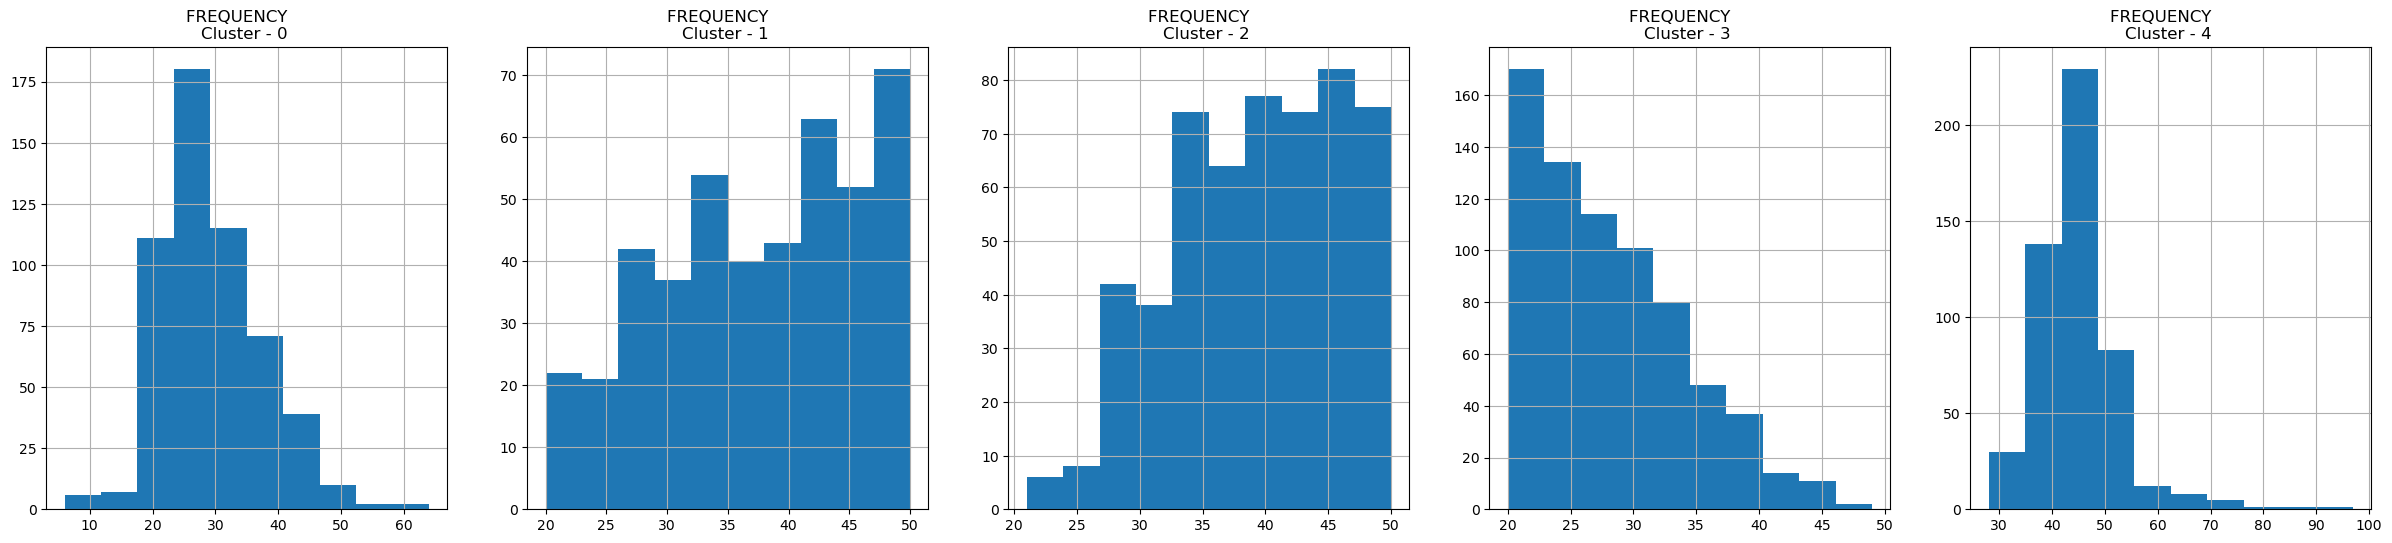

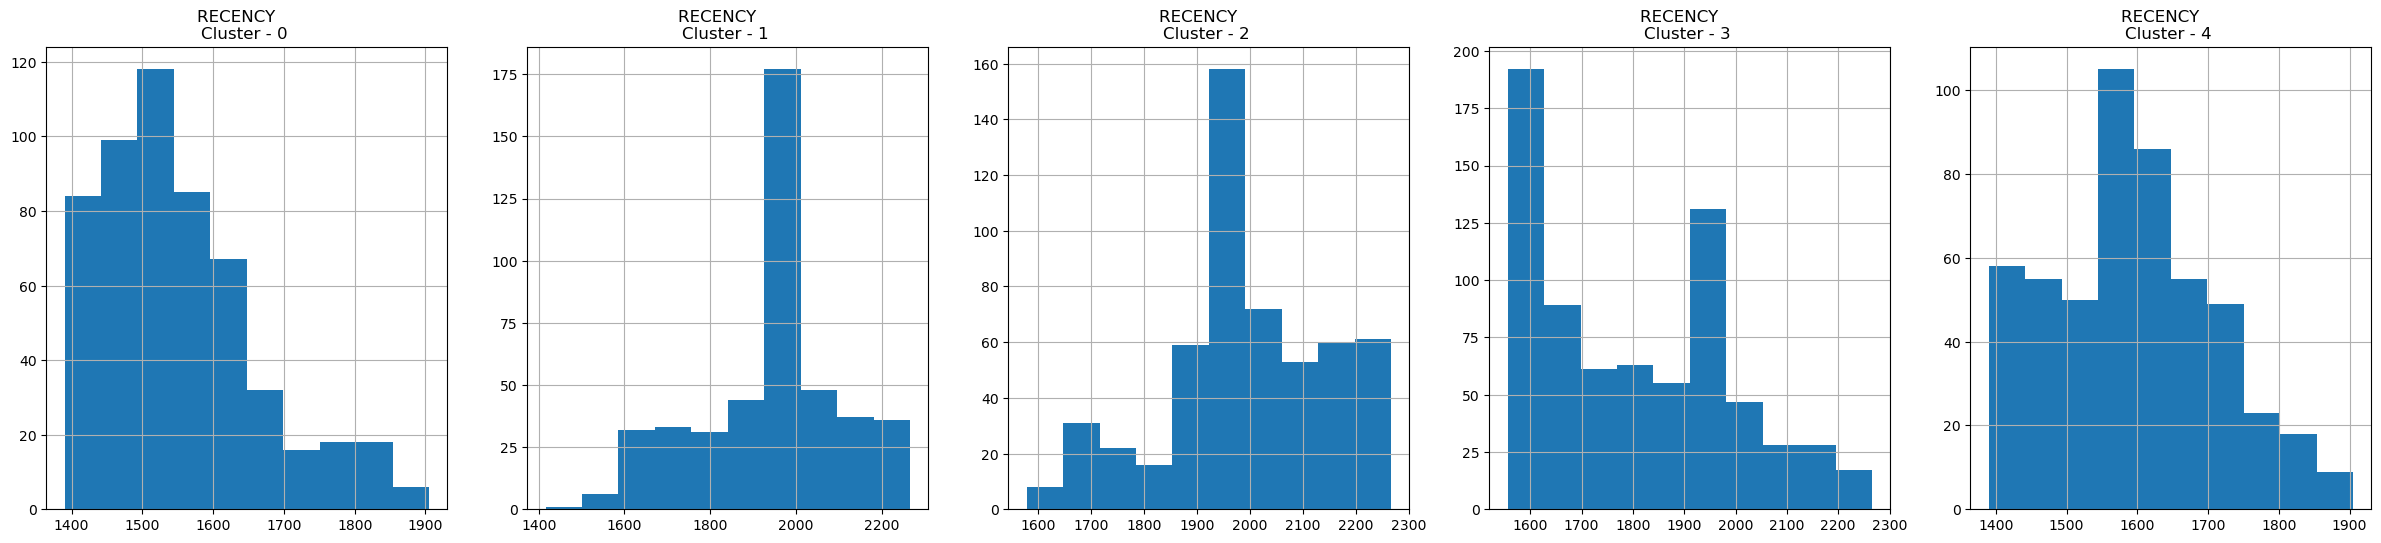

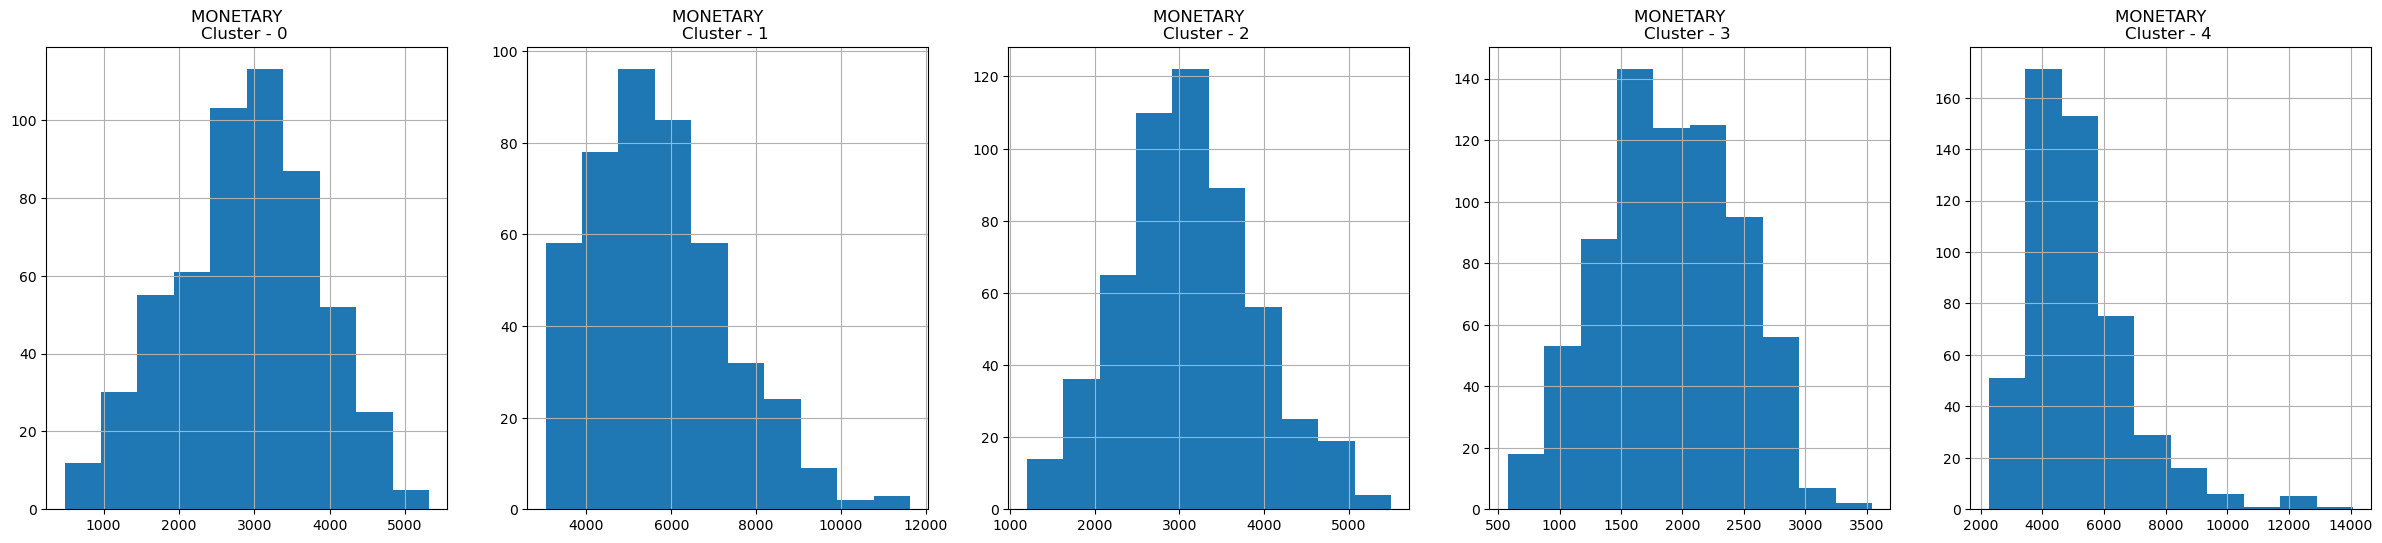

In [68]:
for i in ['FREQUENCY','RECENCY','MONETARY']:
  plt.figure(figsize = (30, 6))
  for j in range(5):
    plt.subplot(1, 5, j+1)
    cluster = df_cluster[df_cluster['cluster'] == j]
    cluster[i].hist()
    plt.title('{}    \nCluster - {} '.format(i,j))
  
  plt.show()

Cluster 0 (Highest):

Customers in this group make purchases in high quantities (mean = 31.98) with a high monetary value (mean = $2256.76).
They correspond to the highest total sales (range: $710.20 to $3599.58) and tend to buy products with higher monetary values.

Cluster 1:

This cluster is similar to cluster 4 with a higher mean frequency (27.91) and monetary value (mean = $3524.58).
Customers in this cluster purchase products with a higher average monetary value (range: $1822.17 to $5868.20) compared to other clusters.

Cluster 2 (Lowest):

Customers in this group buy items in varying quantities (mean = 44.39) with a high monetary value (mean = $4919.60).
They correspond to high total sales (range: $2257.92 to $14082.80) and tend to buy products with higher monetary values.

Cluster 3:

This cluster represents customers who make purchases in medium quantities (mean = 30.03) with a moderate monetary value (mean = $1966.40).
They correspond to moderate total sales (range: $482.13 to $3298.40) and tend to buy products with moderate monetary values.

Cluster 4:

This group represents customers who are active with lower frequency (mean = 38.79) but with a high monetary value (mean = $5320.94).
They correspond to moderate total sales (range: $3036.60 to $11623.70) and tend to buy products with higher monetary values.

## Principal Component Analysis (PCA)

In [69]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [70]:
df_pca = df_rfm[['RECENCY_SCORE', 'FREQUENCY_SCORE', 'MONETARY_SCORE']]

In [71]:
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

In [72]:
pca = PCA()
pca.fit(df_pca_scaled)


PCA()

In [73]:
explained_variance_ratio = pca.explained_variance_ratio_

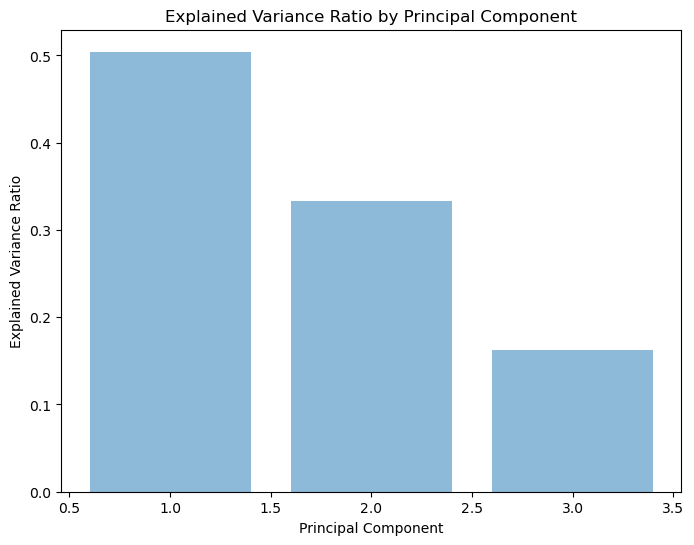

In [74]:
# Plotting explained variance ratio
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.5, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()

The first principal component explains approximately 50.4% of the total variance in the dataset.

The second principal component explains approximately 33.3% of the total variance.

The third principal component explains approximately 16.3% of the total variance.

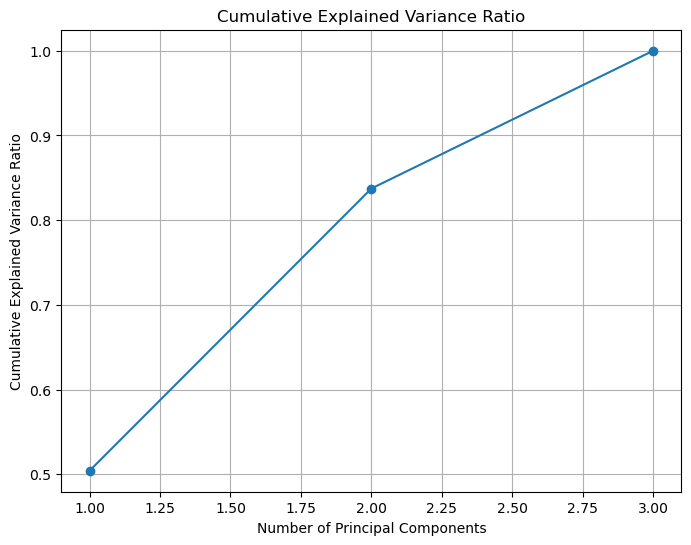

In [75]:
cumulative_explained_variance_ratio = explained_variance_ratio.cumsum()
# Plotting cumulative explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance_ratio) + 1), cumulative_explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [76]:
num_components = 3
pca = PCA(n_components=num_components)
principal_components = pca.fit_transform(df_pca_scaled)
df_principal_components = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, num_components + 1)])


In [77]:
df_principal_components.head()

PC1       PC2       PC3
0 -0.517131  1.407731 -0.401587
1 -0.516713  1.376597  0.597196
2  0.980063  1.467944  0.098436
3  0.980063  1.467944  0.098436
4  0.017737  0.713080  0.076045

In [78]:
pca_df_kmeans = pd.concat([df_principal_components, pd.DataFrame({'cluster':cluster_labels})], axis=1)
pca_df_kmeans.head()

PC1       PC2       PC3  cluster
0 -0.517131  1.407731 -0.401587        2
1 -0.516713  1.376597  0.597196        2
2  0.980063  1.467944  0.098436        1
3  0.980063  1.467944  0.098436        2
4  0.017737  0.713080  0.076045        2

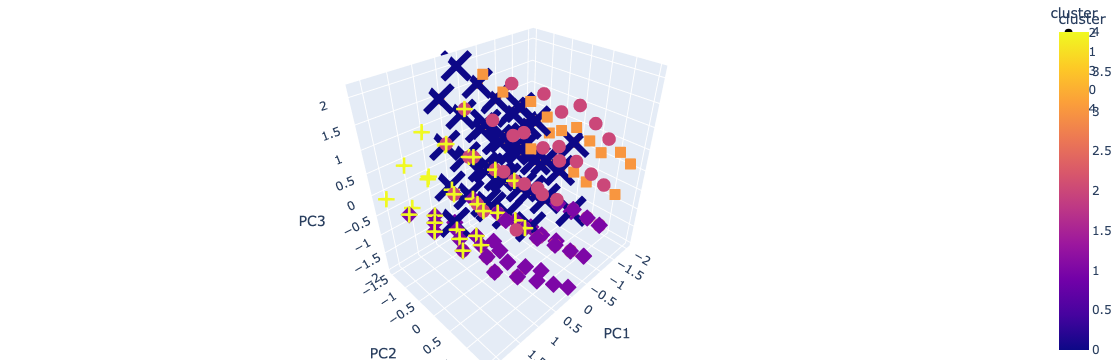

In [79]:
import plotly.express as px 

fig = px.scatter_3d(pca_df_kmeans, x = 'PC1', y = 'PC2', z= 'PC3',color='cluster', symbol = 'cluster')
fig.update_layout(margin = dict(l = 0, r = 0, b = 0, t = 0))

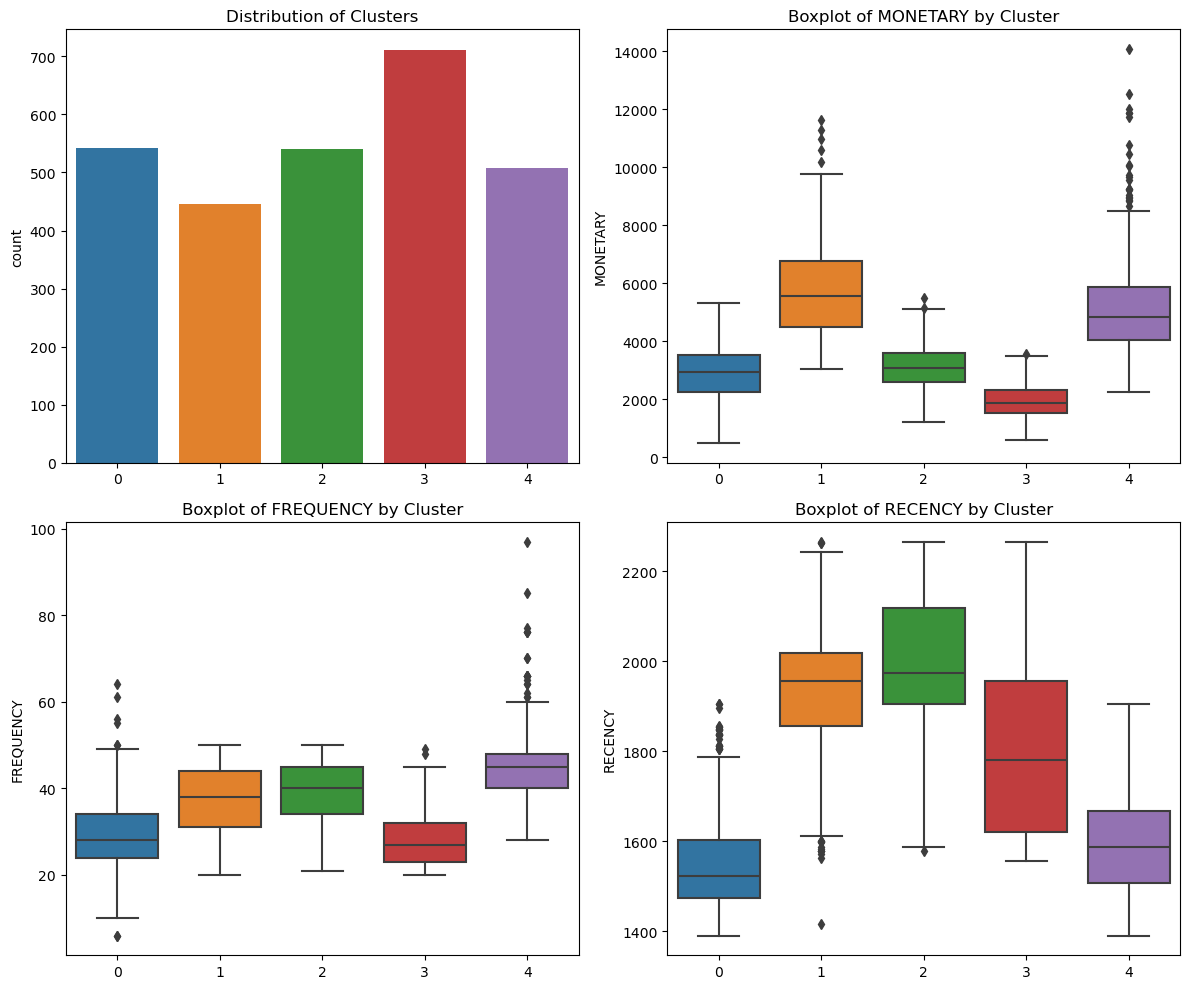

In [80]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.countplot(x=cluster_labels, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Clusters')
sns.boxplot(x=cluster_labels, y=df_cluster["MONETARY"], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of MONETARY by Cluster')
sns.boxplot(x=cluster_labels, y=df_cluster["FREQUENCY"], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of FREQUENCY by Cluster')

sns.boxplot(x=cluster_labels, y=df_cluster["RECENCY"], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of RECENCY by Cluster')

plt.tight_layout()

plt.show()

##### Cluster distribution for Monetary

Cluster 0: Moderate spenders with consistent spending patterns.

Cluster 1: Higher spenders with occasional high-value purchases.

Cluster 2: Highest spenders with frequent high-value purchases.

Cluster 3: Moderate spenders with consistent spending patterns.

Cluster 4: Moderate to high spenders with occasional high-value purchases.

##### Cluster distribution for Frequency

Cluster 0: Moderate frequency of purchases with consistent patterns.

Cluster 1: Slightly lower frequency with occasional higher purchase frequency.

Cluster 2: Higher frequency of purchases, indicating more frequent shopping behavior.

Cluster 3: Moderate frequency with occasional lower purchase frequency.

Cluster 4: Moderate to high frequency with consistent patterns, occasional peaks.

##### Cluster distribution for Recency

Cluster 0: Customers in this cluster have made purchases relatively recently, with a median recency of 1977 days. There are some outliers indicating extremely recent purchases.

Cluster 1: Customers in this cluster have made purchases less recently, with a median recency of 1591 days. There 
are several outliers suggesting more recent purchases.

Cluster 2: Customers in this cluster have made purchases relatively recently, with a median recency of 1594 days. No outliers are present.

Cluster 3: Customers in this cluster have made purchases relatively recently, with a median recency of 1597 days. No outliers are present.

Cluster 4: Customers in this cluster have made purchases relatively recently, with a median recency of 1959 days. There are many outliers, indicating some customers have made very recent purchases.

#### Agglomerative clustering

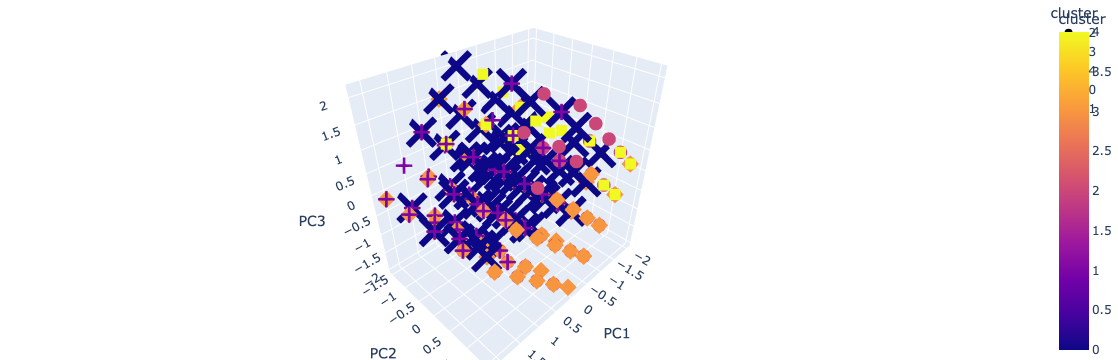

In [81]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

model = AgglomerativeClustering(n_clusters=5, linkage='ward')

cluster_labels = model.fit_predict(df_cluster_scaled)

pca_df_hierarchical = pd.concat([df_principal_components, pd.DataFrame({'cluster': cluster_labels})], axis=1)

fig = px.scatter_3d(pca_df_hierarchical, x='PC1', y='PC2', z='PC3', color='cluster', symbol='cluster')
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

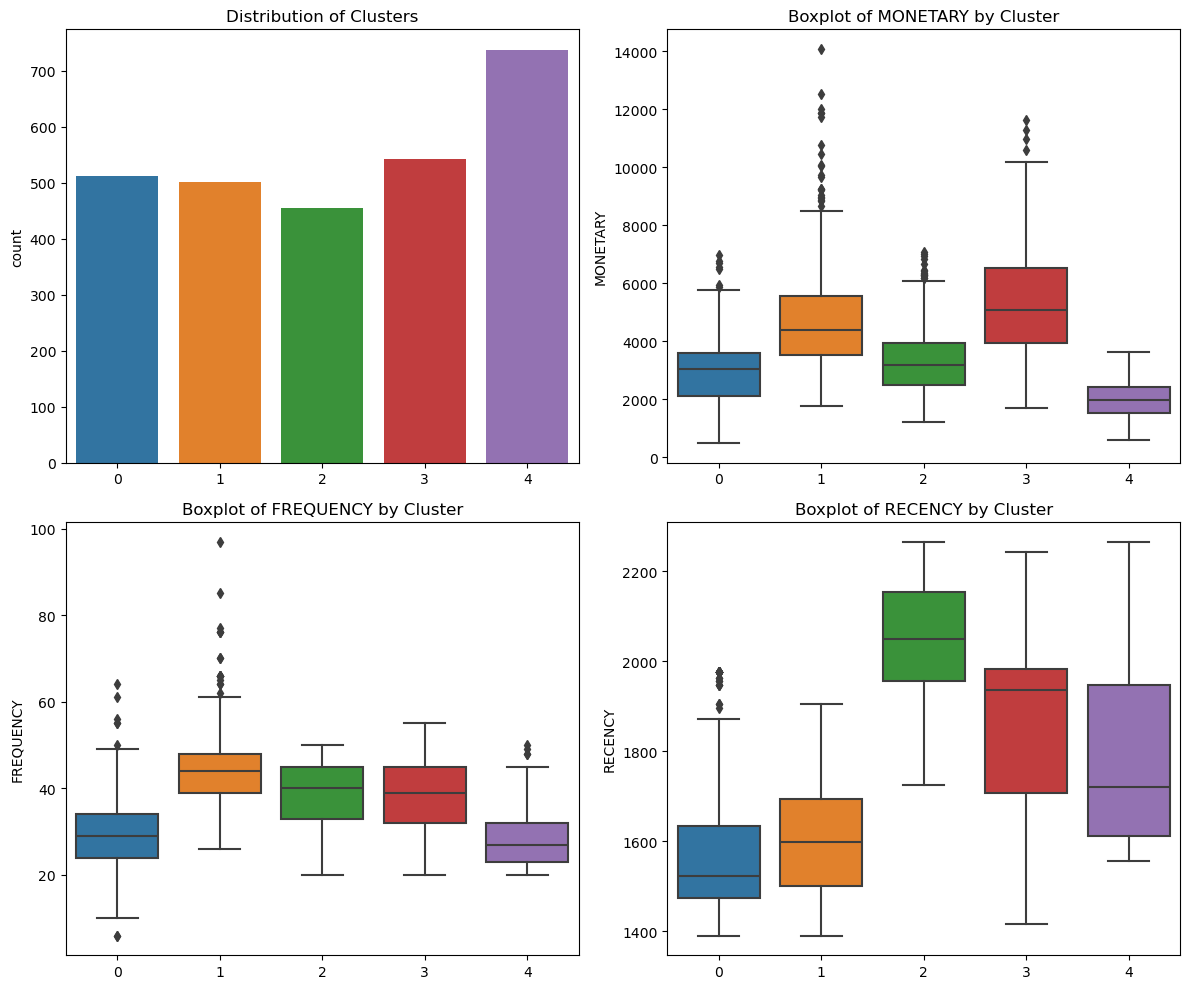

In [82]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.countplot(x=cluster_labels, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Clusters')

sns.boxplot(x=cluster_labels, y=df_cluster["MONETARY"], ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of MONETARY by Cluster')

sns.boxplot(x=cluster_labels, y=df_cluster["FREQUENCY"], ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of FREQUENCY by Cluster')

sns.boxplot(x=cluster_labels, y=df_cluster["RECENCY"], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of RECENCY by Cluster')

plt.tight_layout()

plt.show()

#### Cluster Distribution:

Cluster 4 is the largest, followed by Cluster 3, indicating their significant representation in the dataset. Clusters 0, 1, and 2 are relatively smaller but still notable segments.

#### Monetary Distribution by Clusters:

Cluster 3 has the highest mean monetary value, indicating high-value purchases, while Cluster 4 exhibits the lowest mean monetary value.

#### Frequency Distribution by Clusters:

Customers in Cluster 1 make the most purchases on average, while those in Cluster 4 make the fewest. Clusters 0, 2, and 3 fall in between.

#### Recency Distribution by Clusters:

Clusters 0 and 1 represent customers with recent purchasing behavior, while Cluster 2 reflects longer gaps between purchases. Clusters 3 and 4 exhibit mixed patterns, with varying recency levels.

### Conclusion

In conclusion, both K-means and Agglomerative clustering techniques have provided valuable insights into customer segmentation for our auto sales project.

K-means clustering revealed distinct customer groups based on purchasing behavior, highlighting varying levels of spending frequency, recency, and monetary value. These clusters enable targeted marketing strategies, tailored product offerings, and personalized customer experiences to maximize revenue and customer satisfaction.

On the other hand, Agglomerative clustering further reinforced the identification of customer segments, offering a hierarchical view of cluster distribution and characteristics. This approach adds depth to our understanding of customer behavior, facilitating nuanced marketing strategies and precise customer targeting.

By leveraging the findings from both clustering methods, our auto sales project can optimize resource allocation, enhance customer engagement, and drive business growth in a competitive market landscape.